**Table of contents**<a id='toc0_'></a>    
- [Yahoo Finance Stock Data](#toc1_)    
  - [Import and Clean Data](#toc1_1_)    
  - [Inspect Features](#toc1_2_)    
    - [Adjusted Close Price](#toc1_2_1_)    
    - [Decomposition](#toc1_2_2_)    
    - [ADF Test for Stationarity](#toc1_2_3_)    
  - [Correlation Matrix for Numerical Features](#toc1_3_)    
  - [Binary Target Variable](#toc1_4_)    
- [Reddit data](#toc2_)    
  - [Data Analysis](#toc2_1_)    
    - [Submissions](#toc2_1_1_)    
    - [Daily Submissions vs. Transformed Adjusted Close Price](#toc2_1_2_)    
    - [Submission word count](#toc2_1_3_)    
    - [Comments](#toc2_1_4_)    
    - [Other Features](#toc2_1_5_)    
    - [Daily Comments vs. Transformed Adjusted Close Price](#toc2_1_6_)    
  - [Preprocessing (Can use for a better sentiment dataset than Vader)](#toc2_2_)    
    - [Text Preprocessing for EDA (Not for sentiment analysis & modeling)](#toc2_2_1_)    
  - [VADER Sentiment Analysis](#toc2_3_)    
    - [Submissions](#toc2_3_1_)    
    - [Comments](#toc2_3_2_)    
- [Modeling](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Yahoo Finance Stock Data](#toc0_)

## <a id='toc1_1_'></a>[Import and Clean Data](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import praw

In [2]:
df=pd.read_csv('stocks.csv',  index_col='Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Industry,Sector,Marketcap,Fulltimeemployees,PEratio,Dividendyield,Companyinfo,Ticker
Date,,,,,,,,,,,,,,
2022-09-26,70.400002,73.199997,68.800003,70.000000,70.000000,22569,Biotechnology,Healthcare,44626884,12,NaN,NaN,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2022-09-27,70.800003,76.000000,69.599998,71.199997,71.199997,22569,Biotechnology,Healthcare,44626884,12,NaN,NaN,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2022-09-28,70.800003,75.160004,70.800003,73.599998,73.599998,22569,Biotechnology,Healthcare,44626884,12,NaN,NaN,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2022-09-29,72.400002,72.720001,67.199997,68.800003,68.800003,22569,Biotechnology,Healthcare,44626884,12,NaN,NaN,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2022-09-30,68.400002,70.400002,67.599998,68.400002,68.400002,22569,Biotechnology,Healthcare,44626884,12,NaN,NaN,"Onconetix, Inc., a biotechnology company, focu...",ONCO


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Industry,Sector,Marketcap,Fulltimeemployees,PEratio,Dividendyield,Companyinfo,Ticker
Date,,,,,,,,,,,,,,
2024-09-19,6.28,6.299,4.623,4.800,4.800,9625,Biotechnology,Healthcare,4211183,8,NaN,NaN,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-20,4.68,4.800,4.420,4.420,4.420,9625,Biotechnology,Healthcare,4211183,8,NaN,NaN,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-23,4.42,4.700,4.100,4.100,4.100,9625,Biotechnology,Healthcare,4211183,8,NaN,NaN,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-24,4.11,4.315,3.835,3.963,3.963,9625,Biotechnology,Healthcare,4211183,8,NaN,NaN,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-25,4.00,4.110,3.800,3.845,3.845,9625,Biotechnology,Healthcare,4211183,8,NaN,NaN,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA


In [5]:
df.replace('N/A', None, inplace=True) #replace srings with nonetype
df.isna().any() #check for nones

Open                 False
High                 False
Low                  False
Close                False
Adj Close            False
Volume               False
Industry             False
Sector               False
Marketcap            False
Fulltimeemployees    False
PEratio               True
Dividendyield         True
Companyinfo          False
Ticker               False
dtype: bool

In [6]:
print(df.PEratio.isna().all(), df.Dividendyield.isna().all()) #check if all items are nones

True True


In [7]:
df=df.drop(columns=['PEratio', 'Dividendyield']) #drop these columns

In [8]:
df.rename(columns={'Adj Close':'Adjclose'}, inplace=True) #rename column
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adjclose             float64
Volume                 int64
Industry              object
Sector                object
Marketcap              int64
Fulltimeemployees      int64
Companyinfo           object
Ticker                object
dtype: object

In [9]:
df1=df.copy()

In [10]:
df=df.groupby('Ticker').resample('D').ffill().drop(columns=['Ticker']).reset_index().set_index('Date') #resample data
df.tail()

,Ticker,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo
Date,,,,,,,,,,,,
2024-09-21,TNXP,0.15,0.15,0.14,0.15,0.15,38747709,Biotechnology,Healthcare,22257934,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-22,TNXP,0.15,0.15,0.14,0.15,0.15,38747709,Biotechnology,Healthcare,22257934,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-23,TNXP,0.14,0.14,0.13,0.13,0.13,38747709,Biotechnology,Healthcare,22257934,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-24,TNXP,0.14,0.14,0.13,0.13,0.13,38747709,Biotechnology,Healthcare,22257934,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-25,TNXP,0.13,0.13,0.13,0.13,0.13,38747709,Biotechnology,Healthcare,22257934,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."


## <a id='toc1_2_'></a>[Inspect Features](#toc0_)

In [11]:
print(df.Industry.unique())
print(df.Sector.unique())

['Information Technology Services' 'Specialty Chemicals' 'Biotechnology']
['Technology' 'Basic Materials' 'Healthcare']


In [12]:
industry_groups=df.groupby('Industry')['Ticker'].unique()
print("\nStock Tickers by Industry:")
print(industry_groups)
sector_groups=df.groupby('Sector')['Ticker'].unique()
print("\nStock Tickers by Sector:")
print(sector_groups)


Stock Tickers by Industry:
Industry
Biotechnology                      [KTTA, ONCO, TNXP]
Information Technology Services                [APLD]
Specialty Chemicals                            [CNEY]
Name: Ticker, dtype: object

Stock Tickers by Sector:
Sector
Basic Materials                [CNEY]
Healthcare         [KTTA, ONCO, TNXP]
Technology                     [APLD]
Name: Ticker, dtype: object


In [13]:
for company in df.Companyinfo.unique():
    print(textwrap.fill(company, width=80))
    print()

Applied Digital Corporation designs, develops, and operates digital
infrastructure solutions and cloud services high-performance computing (HPC) and
artificial intelligence industries in North America. It operates through three
segments: Data Center Hosting Business, Cloud Services Business, and HPC Hosting
Business. The company offers infrastructure services to crypto mining customers;
and GPU computing solutions for critical workloads related to AI, machine
learning, and other HPC tasks. It also engages in the designing, constructing,
and managing of data centers to support HPC applications. The company was
formerly known as Applied Blockchain, Inc. and changed its name to Applied
Digital Corporation in November 2022. Applied Digital Corporation is based in
Dallas, Texas.

CN Energy Group. Inc., through its subsidiaries, engages in the manufacture and
supply of wood-based activated carbon primarily in China. The company's
activated carbon is used in pharmaceutical manufacturing, indu

In [14]:
df.groupby(['Ticker']).Volume.describe() 

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,731.0,15448161.0,0.0,15448161.0,15448161.0,15448161.0,15448161.0,15448161.0
CNEY,731.0,715825.0,0.0,715825.0,715825.0,715825.0,715825.0,715825.0
KTTA,731.0,9625.0,0.0,9625.0,9625.0,9625.0,9625.0,9625.0
ONCO,731.0,22569.0,0.0,22569.0,22569.0,22569.0,22569.0,22569.0
TNXP,731.0,38747709.0,0.0,38747709.0,38747709.0,38747709.0,38747709.0,38747709.0


In [15]:
df.groupby('Ticker').Volume.mean().sort_values(ascending=False) #mean market cap

Ticker
TNXP    38747709.0
APLD    15448161.0
CNEY      715825.0
ONCO       22569.0
KTTA        9625.0
Name: Volume, dtype: float64

In [16]:
df.groupby(['Ticker']).Marketcap.describe() 


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,731.0,1.733640e+09,0.0,1.733640e+09,1.733640e+09,1.733640e+09,1.733640e+09,1.733640e+09
CNEY,731.0,6.870594e+06,0.0,6.870594e+06,6.870594e+06,6.870594e+06,6.870594e+06,6.870594e+06
KTTA,731.0,4.211183e+06,0.0,4.211183e+06,4.211183e+06,4.211183e+06,4.211183e+06,4.211183e+06
ONCO,731.0,4.462688e+07,0.0,4.462688e+07,4.462688e+07,4.462688e+07,4.462688e+07,4.462688e+07
TNXP,731.0,2.225793e+07,0.0,2.225793e+07,2.225793e+07,2.225793e+07,2.225793e+07,2.225793e+07


In [17]:
df.groupby('Ticker').Marketcap.mean().sort_values(ascending=False) #mean market cap

Ticker
APLD    1.733640e+09
ONCO    4.462688e+07
TNXP    2.225793e+07
CNEY    6.870594e+06
KTTA    4.211183e+06
Name: Marketcap, dtype: float64

In [18]:
df.groupby(['Ticker']).Fulltimeemployees.describe() 


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,731.0,150.0,0.0,150.0,150.0,150.0,150.0,150.0
CNEY,731.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
KTTA,731.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
ONCO,731.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0
TNXP,731.0,103.0,0.0,103.0,103.0,103.0,103.0,103.0


In [19]:
df.groupby('Ticker').Fulltimeemployees.mean().sort_values(ascending=False) #mean market cap

Ticker
APLD    150.0
TNXP    103.0
CNEY     30.0
ONCO     12.0
KTTA      8.0
Name: Fulltimeemployees, dtype: float64

### <a id='toc1_2_1_'></a>[Adjusted Close Price](#toc0_)

In [20]:
df.groupby(['Ticker']).Adjclose.describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,731.0,4.585239,2.110286,1.510,2.850,4.420000,5.895000,10.240000
CNEY,731.0,10.346483,16.896155,0.280,1.145,3.570000,7.050000,74.099998
KTTA,731.0,9.674337,4.937507,3.845,6.645,7.960000,11.700000,26.000000
ONCO,731.0,26.189108,19.328122,2.960,6.740,22.080000,44.799999,73.599998
TNXP,731.0,50.977606,59.242234,0.130,8.800,25.280001,80.000000,260.000000


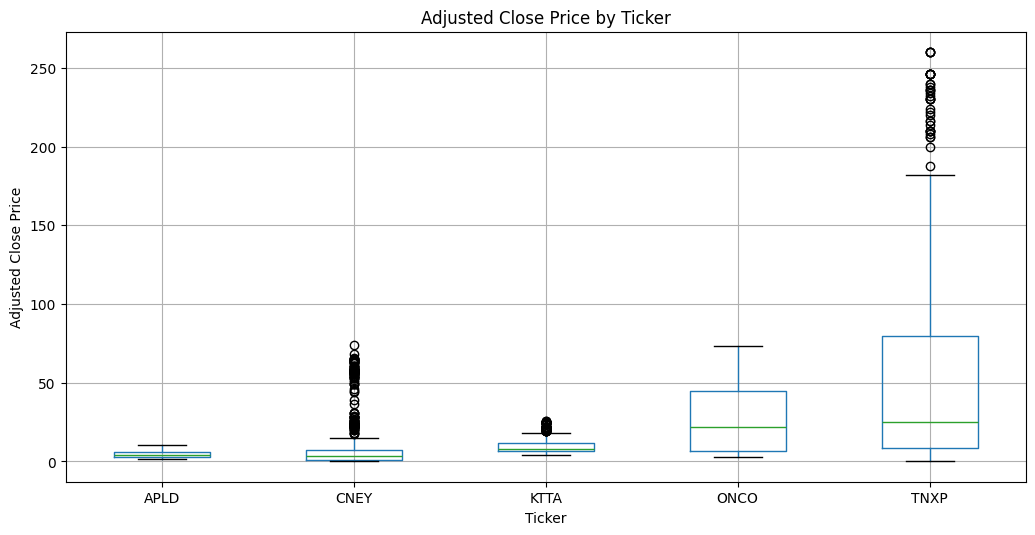

In [21]:
df.boxplot(column='Adjclose', by='Ticker', figsize=(12,6))
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price by Ticker')
plt.suptitle('')
plt.show()

In [22]:
#show date range for each stock ticker - no date column, just index
for ticker in df.Ticker.unique():
    print(ticker, df[df.Ticker==ticker].index.min(), df[df.Ticker==ticker].index.max())

APLD 2022-09-26 00:00:00 2024-09-25 00:00:00
CNEY 2022-09-26 00:00:00 2024-09-25 00:00:00
KTTA 2022-09-26 00:00:00 2024-09-25 00:00:00
ONCO 2022-09-26 00:00:00 2024-09-25 00:00:00
TNXP 2022-09-26 00:00:00 2024-09-25 00:00:00


In [23]:
df[df.Ticker=='ONCO'].index.min().date()

datetime.date(2022, 9, 26)

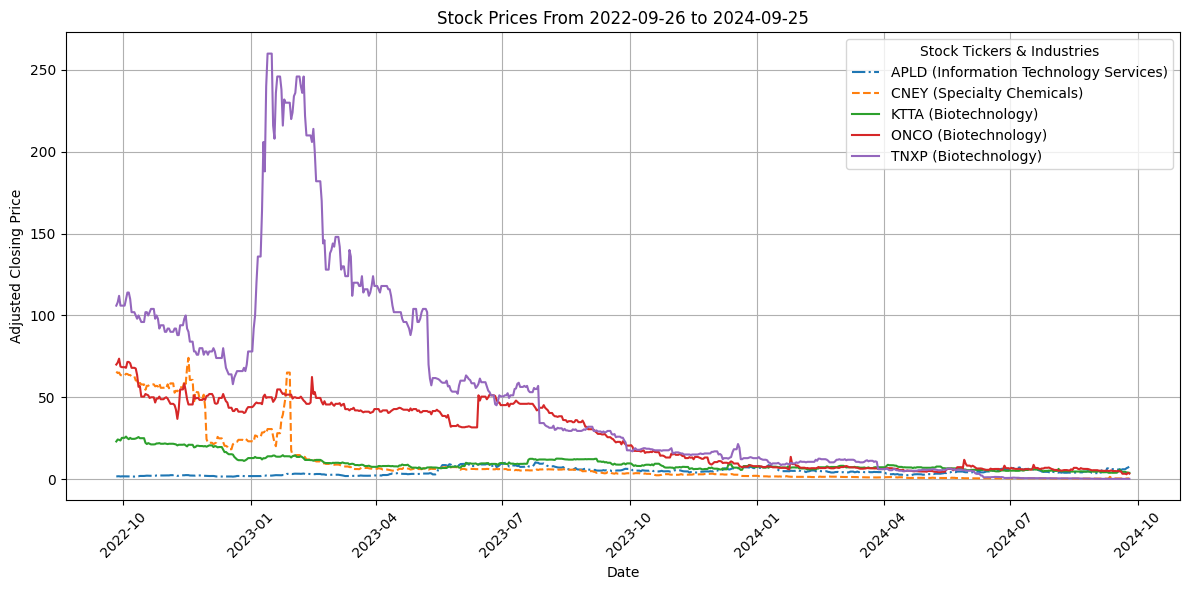

In [24]:
plt.figure(figsize=(12, 6))

# Get unique industries and define line styles
line_styles = ['-.', '--', '-', ':']  # Different line styles
style_map = {industry: line_styles[i % len(line_styles)] for i, industry in enumerate(df.Industry.unique())}

# Create a list to hold custom legend handles
legend_handles = []

# Loop through each ticker to plot
for ticker in df['Ticker'].unique():
    dfbyticker = df[df['Ticker'] == ticker]
    industry = dfbyticker['Industry'].iloc[0]  # Get the industry for the ticker
    line_style = style_map[industry]  # Get the line style for the industry
    
    # Plot the adjusted closing price
    line, = plt.plot(dfbyticker.index, dfbyticker['Adjclose'], 
                     label=ticker, 
                     linestyle=line_style)  # Apply the industry line style
    
    # Create a custom legend handle with the same color as the line
    legend_handles.append((industry, ticker, line.get_color(), line_style))  # Store as a tuple

# Create legend lines with appropriate colors (without sorting)
legend_lines = [mlines.Line2D([], [], color=color, linestyle=style, label=f'{ticker} ({industry})') 
                for industry, ticker, color, style in legend_handles]

plt.title(f'Stock Prices From {df[df.Ticker==ticker].index.min().date()} to {df[df.Ticker==ticker].index.max().date()}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.xticks(rotation=45)

# Add the custom legend with colored handles
plt.legend(handles=legend_lines, title='Stock Tickers & Industries')

plt.grid()
plt.tight_layout()
plt.show()

### <a id='toc1_2_2_'></a>[Decomposition](#toc0_)

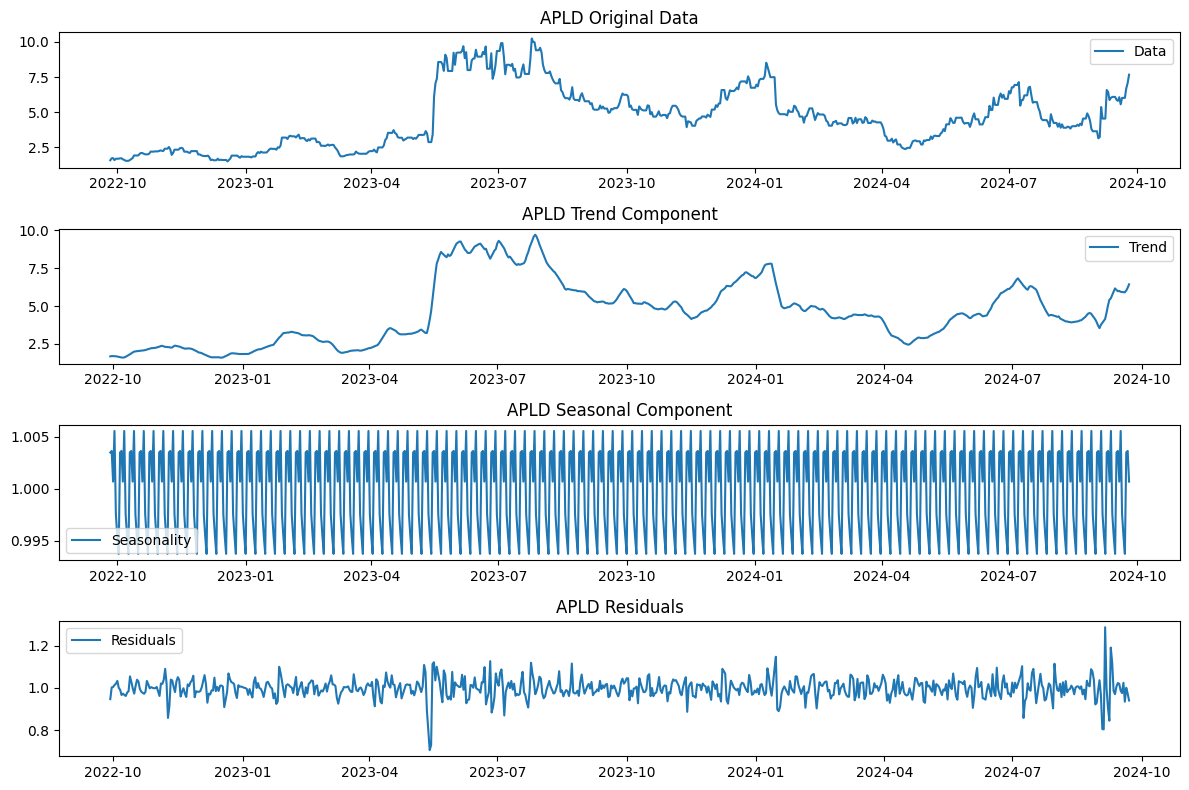

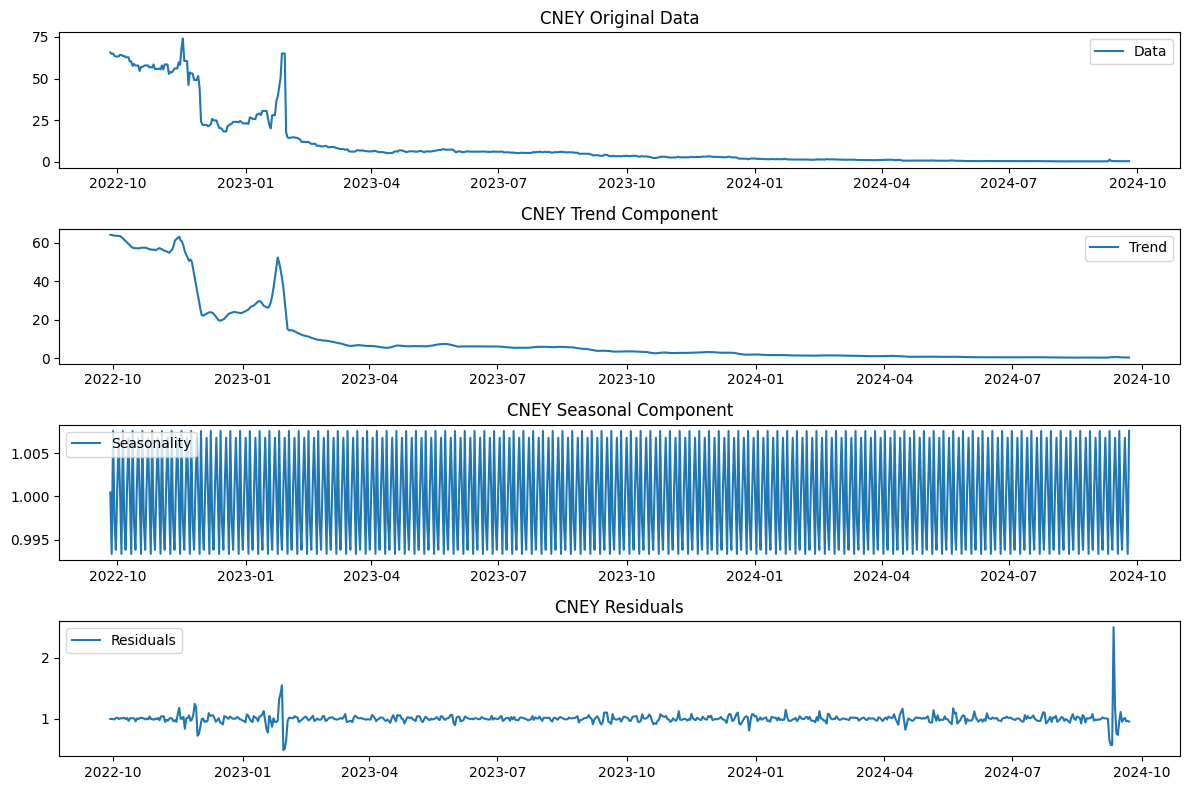

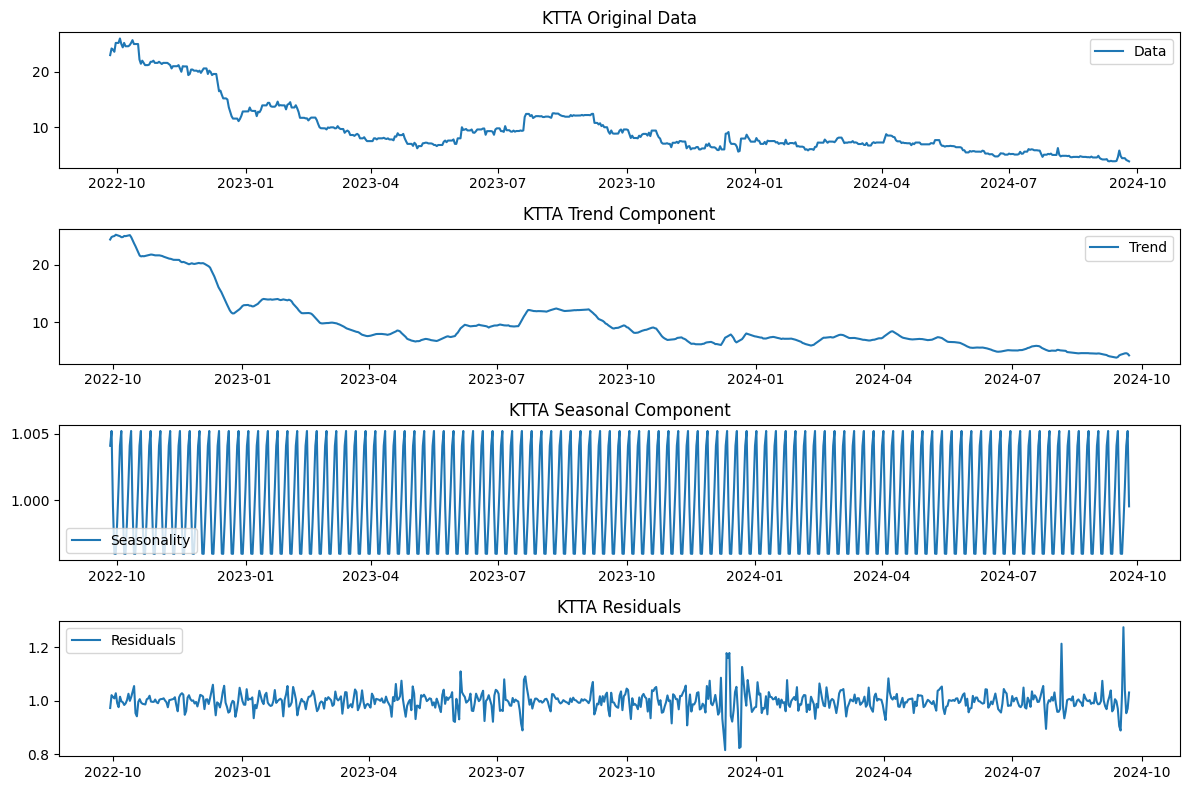

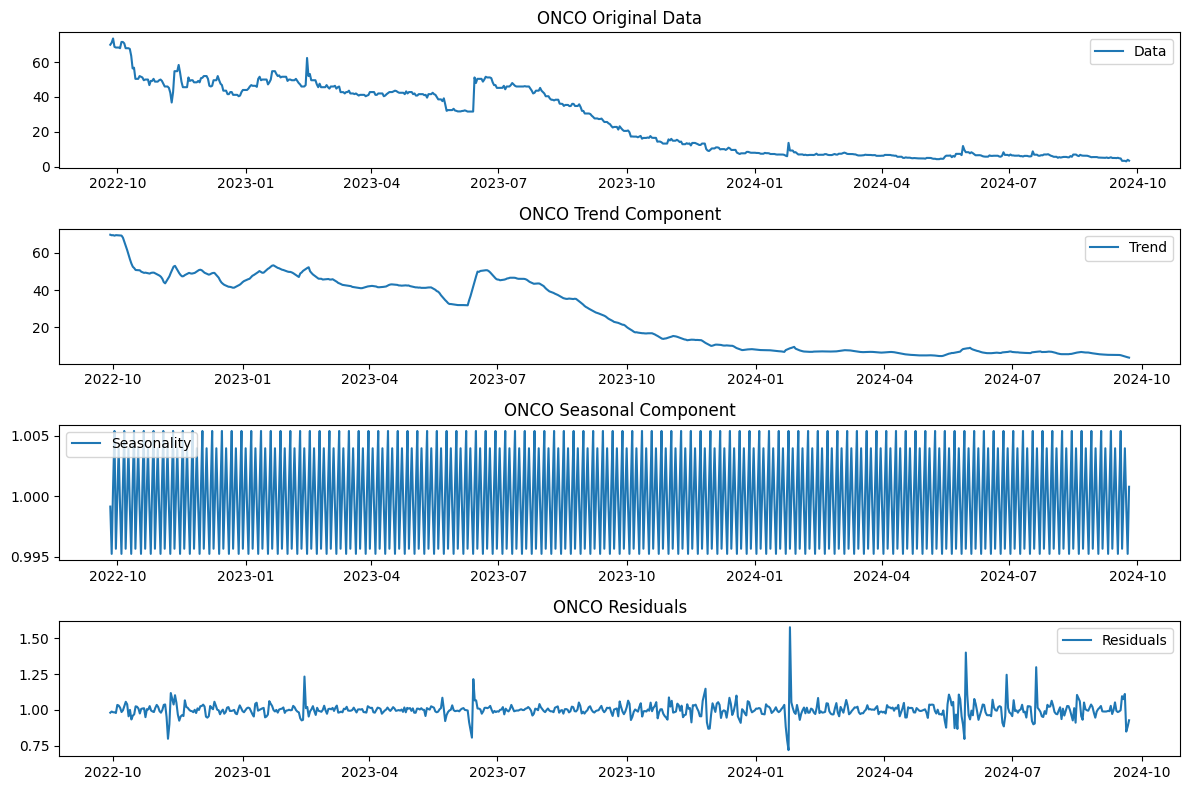

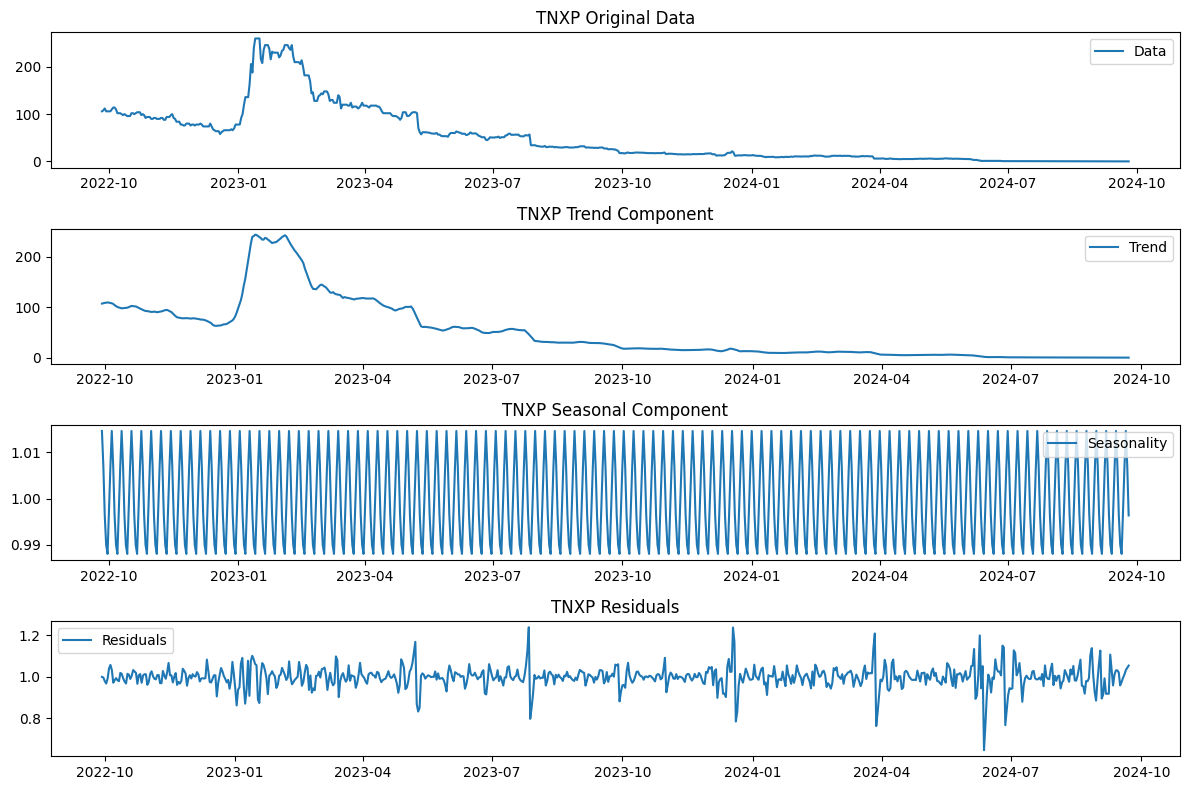

In [25]:
#plot each graph of seasonal decompose (multiplicative) for each ticker using Adjclose, list comprehension
seasonal_decompositions = [seasonal_decompose(df[df['Ticker'] == ticker]['Adjclose'], model='multiplicative')
                           for ticker in df['Ticker'].unique()]

for decomp, ticker in zip(seasonal_decompositions, df['Ticker'].unique()):
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomp.observed, label='Data')
    plt.title(f'{ticker} Original Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomp.trend, label='Trend')
    plt.title(f'{ticker} Trend Component')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomp.seasonal, label='Seasonality')
    plt.title(f'{ticker} Seasonal Component')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomp.resid, label='Residuals')
    plt.title(f'{ticker} Residuals')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()



### <a id='toc1_2_3_'></a>[ADF Test for Stationarity](#toc0_)

In [26]:
for ticker in df.Ticker.unique():
    result=adfuller(df[df.Ticker==ticker].Adjclose)
    print(f'{ticker} ADF Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')

APLD ADF Statistic: -2.346, p-value: 0.158
CNEY ADF Statistic: -3.440, p-value: 0.010
KTTA ADF Statistic: -2.442, p-value: 0.130
ONCO ADF Statistic: -1.967, p-value: 0.301
TNXP ADF Statistic: -1.880, p-value: 0.341


The null hypothesis for the ADF Statistic is that the time series is non-stationary. We are able to reject the null at an alpha = 0.05 for only the CNEY series. Hence we conclude it is stationary from the ADF test.

In [27]:
df['Logdiff']=df.groupby('Ticker').Adjclose.transform(lambda x: np.log(x).diff())

In [28]:
df.groupby('Ticker').Logdiff.head()

Date
2022-09-26         NaN
2022-09-27    0.084387
2022-09-28    0.005764
2022-09-29   -0.083881
2022-09-30    0.060625
2022-09-26         NaN
2022-09-27   -0.013793
2022-09-28    0.004619
2022-09-29   -0.023311
2022-09-30   -0.004728
2022-09-26         NaN
2022-09-27    0.050858
2022-09-28   -0.008299
2022-09-29   -0.016807
2022-09-30    0.065597
2022-09-26         NaN
2022-09-27    0.016998
2022-09-28    0.033152
2022-09-29   -0.067441
2022-09-30   -0.005831
2022-09-26         NaN
2022-09-27    0.018692
2022-09-28    0.036368
2022-09-29   -0.055060
2022-09-30    0.000000
Name: Logdiff, dtype: float64

In [29]:
#drop nan rows from df
df.dropna(subset=['Logdiff'], inplace=True)
df.groupby('Ticker').Logdiff.head()


Date
2022-09-27    0.084387
2022-09-28    0.005764
2022-09-29   -0.083881
2022-09-30    0.060625
2022-10-01    0.000000
2022-09-27   -0.013793
2022-09-28    0.004619
2022-09-29   -0.023311
2022-09-30   -0.004728
2022-10-01    0.000000
2022-09-27    0.050858
2022-09-28   -0.008299
2022-09-29   -0.016807
2022-09-30    0.065597
2022-10-01    0.000000
2022-09-27    0.016998
2022-09-28    0.033152
2022-09-29   -0.067441
2022-09-30   -0.005831
2022-10-01    0.000000
2022-09-27    0.018692
2022-09-28    0.036368
2022-09-29   -0.055060
2022-09-30    0.000000
2022-10-01    0.000000
Name: Logdiff, dtype: float64

In [30]:
df.shape

(3650, 13)

In [31]:
for ticker in df.Ticker.unique():
    y=df[df.Ticker==ticker].Logdiff
    result=adfuller(y)
    print(f'{ticker} ADF Statistic (logged & diffed): {result[0]:.3f}, p-value: {result[1]:.3f}')

APLD ADF Statistic (logged & diffed): -26.588, p-value: 0.000
CNEY ADF Statistic (logged & diffed): -11.451, p-value: 0.000
KTTA ADF Statistic (logged & diffed): -11.969, p-value: 0.000
ONCO ADF Statistic (logged & diffed): -16.200, p-value: 0.000
TNXP ADF Statistic (logged & diffed): -24.918, p-value: 0.000


All tests conclude all stocks are now stationary except TNXP with the KPSS test. TNXP may be 

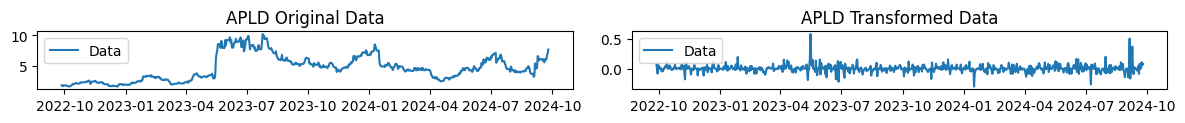

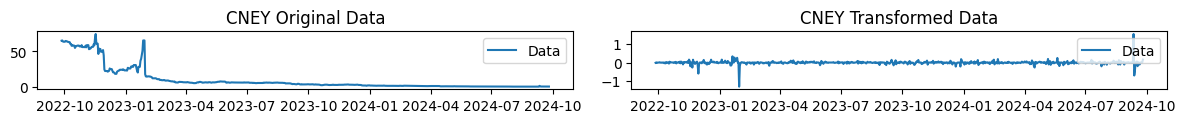

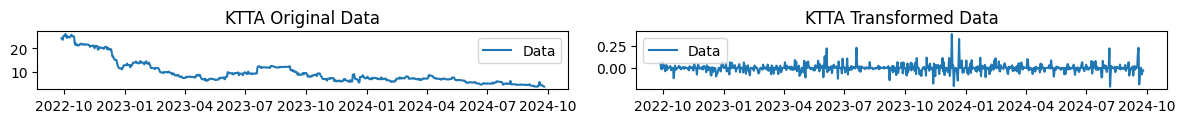

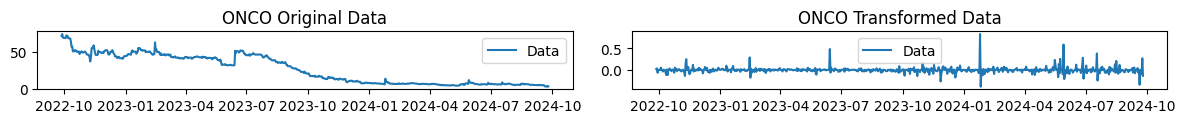

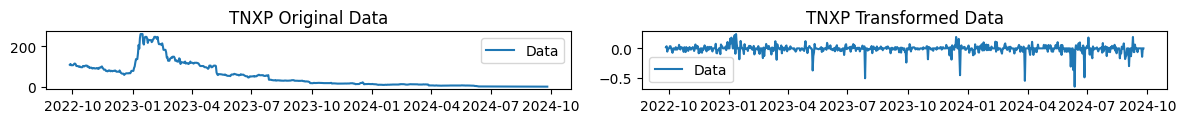

In [32]:
for ticker in df.Ticker.unique():
    y=df[df.Ticker==ticker].Adjclose
    newy=df[df.Ticker==ticker].Logdiff

    plt.figure(figsize=(12, 4))

    plt.subplot(421)
    plt.plot(y, label='Data')
    plt.title(f'{ticker} Original Data')
    plt.legend(loc='best')

    plt.subplot(422)
    plt.plot(newy, label='Data')
    plt.title(f'{ticker} Transformed Data')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

Each stock is now stationary as shown above. 

## <a id='toc1_3_'></a>[Correlation Matrix for Numerical Features](#toc0_)

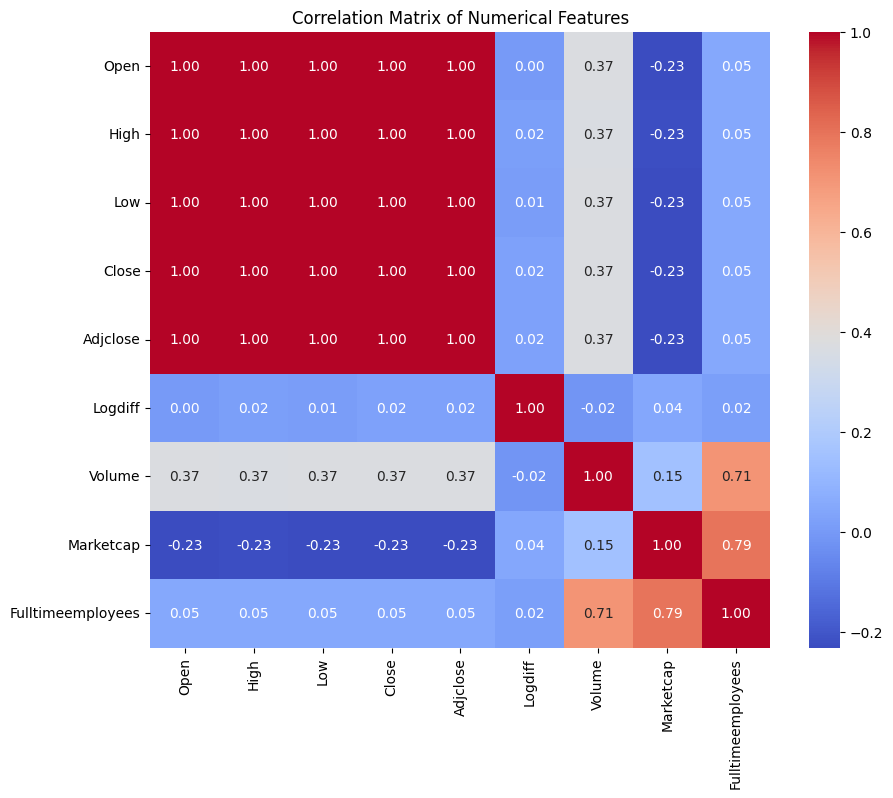

In [33]:
df_numerical = df[['Open', 'High', 'Low', 'Close', 'Adjclose', 'Logdiff', 'Volume', 'Marketcap', 'Fulltimeemployees']]
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

As assumed, open, high, low, close, and adjusted close prices are all identical parameters. 

## <a id='toc1_4_'></a>[Binary Target Variable](#toc0_)

In [34]:
#make predictive column for "To simplify the target variable, we ask that you use a binary classifier (1/0) that denotes whether there was a price increase (1) or not (0) from the previous trading day."
for ticker in df['Ticker'].unique():
    df.loc[df['Ticker'] == ticker, 'Priceincrease'] = (df[df['Ticker'] == ticker]['Adjclose'].diff() > 0).astype(int)
df.head()

,Ticker,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Logdiff,Priceincrease
Date,,,,,,,,,,,,,,
2022-09-27,APLD,1.66,1.76,1.630,1.73,1.73,15448161,Information Technology Services,Technology,1733640064,150,"Applied Digital Corporation designs, develops,...",0.084387,0.0
2022-09-28,APLD,1.74,1.78,1.695,1.74,1.74,15448161,Information Technology Services,Technology,1733640064,150,"Applied Digital Corporation designs, develops,...",0.005764,1.0
2022-09-29,APLD,1.70,1.71,1.530,1.60,1.60,15448161,Information Technology Services,Technology,1733640064,150,"Applied Digital Corporation designs, develops,...",-0.083881,0.0
2022-09-30,APLD,1.59,1.81,1.590,1.70,1.70,15448161,Information Technology Services,Technology,1733640064,150,"Applied Digital Corporation designs, develops,...",0.060625,1.0
2022-10-01,APLD,1.59,1.81,1.590,1.70,1.70,15448161,Information Technology Services,Technology,1733640064,150,"Applied Digital Corporation designs, develops,...",0.000000,0.0


In [35]:
df.Priceincrease

Date
2022-09-27    0.0
2022-09-28    1.0
2022-09-29    0.0
2022-09-30    1.0
2022-10-01    0.0
             ... 
2024-09-21    0.0
2024-09-22    0.0
2024-09-23    0.0
2024-09-24    0.0
2024-09-25    0.0
Name: Priceincrease, Length: 3650, dtype: float64

# <a id='toc2_'></a>[Reddit data](#toc0_)

## <a id='toc2_1_'></a>[Data Analysis](#toc0_)

### <a id='toc2_1_1_'></a>[Submissions](#toc0_)

In [36]:
import datetime
import string
import re
import demoji
from urllib.parse import urlparse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon', 'stopwords', 'punkt', 'wordnet')

True

In [37]:
rdf=pd.read_csv('reddit.csv')
rdf.head()

,ticker,subreddit,query,title,score,id,author,url,post_date,post_upvotes,selftext,num_comments,comments
0,APLD,wallstreetbets,APLD,Found a newspaper from 2011. Imagine all the g...,5106,1aryoah,nywarpath,https://i.redd.it/s7q97fka9vic1.jpeg,2024-02-16 03:26:31,5106,NaN,688,[{'comment': '\n**User Report**| | | |\n:--|:-...
1,APLD,wallstreetbets,APLD,Micro Trading Options on QQQ!,314,1fbjdhn,Vivo__,https://i.redd.it/vd1e4xdqugnd1.jpeg,2024-09-07 22:48:32,314,The good side to options is its worst side! Yo...,153,[{'comment': '\n**User Report**| | | |\n:--|:-...
2,APLD,wallstreetbets,APLD,Most Anticipated Earnings Releases for the wee...,259,194hj19,ItsNotYourFault,https://i.redd.it/d2nn39ignwbc1.png,2024-01-12 00:37:59,259,NaN,244,[{'comment': 'Not open on MLK Day? He’d want p...
3,APLD,wallstreetbets,APLD,Dow drops more than 400 points as Wall Street ...,214,1bu74lx,mediterranean2,https://www.reddit.com/r/wallstreetbets/commen...,2024-04-02 19:07:01,214,The Dow Jones Industrial Average\n fell for a ...,54,[{'comment': '\n**User Report**| | | |\n:--|:-...
4,APLD,stocks,APLD,(9/20) Friday's Pre-Market News & Stock Movers,18,1flatw5,bigbear0083,https://www.reddit.com/r/stocks/comments/1flat...,2024-09-20 12:30:23,18,#Good Friday morning traders and investors of ...,0,[]


In [38]:
rdf.shape

(816, 13)

In [39]:
rdf.post_date=pd.to_datetime(rdf.post_date)

In [40]:
#search for rows with same id
rdf[rdf.duplicated(subset='id', keep=False)].sort_values(by='id')

,ticker,subreddit,query,title,score,id,author,url,post_date,post_upvotes,selftext,num_comments,comments
730,TNXP,shortsqueeze,Tonix,#TNXP TONIX IS A LITTLE FISH IN A SEA OF SHARK...,1,1030xmu,neverbackdowm,https://www.reddit.com/r/Shortsqueeze/comments...,2023-01-04 11:06:29,1,Tonix does not produce anything yet but has a ...,5,[{'comment': 'get ready for some fireworks… ov...
632,TNXP,shortsqueeze,TNXP,#TNXP TONIX IS A LITTLE FISH IN A SEA OF SHARK...,0,1030xmu,neverbackdowm,https://www.reddit.com/r/Shortsqueeze/comments...,2023-01-04 11:06:29,0,Tonix does not produce anything yet but has a ...,5,[{'comment': 'get ready for some fireworks… ov...
784,TNXP,tnxp,Tonix,#TNXP TONIX IS A LITTLE FISH IN A SEA OF SHARK...,2,1030xri,neverbackdowm,/r/Shortsqueeze/comments/1030xmu/tnxp_tonix_is...,2023-01-04 11:06:42,2,NaN,4,"[{'comment': 'TNXP is the shark, the sharehol..."
699,TNXP,tnxp,TNXP,#TNXP TONIX IS A LITTLE FISH IN A SEA OF SHARK...,1,1030xri,neverbackdowm,/r/Shortsqueeze/comments/1030xmu/tnxp_tonix_is...,2023-01-04 11:06:42,1,NaN,4,"[{'comment': 'TNXP is the shark, the sharehol..."
743,TNXP,stockinvest,Tonix,TNXP Price Predictions - Tonix Pharmaceuticals...,4,108azi5,TheWizzr,https://www.youtube.com/watch?v=819XUIfvj4k,2023-01-10 14:20:54,4,NaN,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,TNXP,stocktitan,TNXP,TNXP | Tonix Pharmaceuticals Announces Issuanc...,2,1fki0so,Stock_Titan,https://www.stocktitan.net/news/TNXP/tonix-pha...,2024-09-19 11:00:03,2,NaN,0,[]
455,CNEY,pennystocks,CN energy,3 penny stocks that might help you achieve fin...,77,1fknz7h,Stocksy1234,https://www.reddit.com/r/pennystocks/comments/...,2024-09-19 15:43:36,77,Hey! Here are some of the main stocks that I h...,30,[{'comment': '\nDoes this submission fit our s...
22,APLD,pennystocks,APLD,3 penny stocks that might help you achieve fin...,76,1fknz7h,Stocksy1234,https://www.reddit.com/r/pennystocks/comments/...,2024-09-19 15:43:36,76,Hey! Here are some of the main stocks that I h...,30,[{'comment': '\nDoes this submission fit our s...
529,KTTA,stocktitan,pasithea therapeutics,KTTA | Pasithea Therapeutics to Call Special M...,1,xv3f3b,Stock_Titan,https://www.stocktitan.net/news/KTTA/pasithea-...,2022-10-04 02:54:32,1,NaN,0,[]


In [41]:
#drop duplicates by id
rdf.drop_duplicates(subset='id', inplace=True)

In [42]:
rdf.shape

(720, 13)

In [43]:
rdf.groupby('ticker').size()

ticker
APLD    404
CNEY     84
KTTA      9
ONCO     51
TNXP    172
dtype: int64

KTTA value counts are too low. Drop from both datasets.

In [44]:
#drop rows with KTTA ticker 
df=df[df.Ticker!='KTTA']
rdf=rdf[rdf.ticker!='KTTA']

In [45]:
rdf.title.isna().sum()

0

In [46]:
#check for more duplicates
rdf[rdf.title.duplicated()==True].sort_values(by='title').head()

,ticker,subreddit,query,title,score,id,author,url,post_date,post_upvotes,selftext,num_comments,comments
699,TNXP,tnxp,TNXP,#TNXP TONIX IS A LITTLE FISH IN A SEA OF SHARK...,1,1030xri,neverbackdowm,/r/Shortsqueeze/comments/1030xmu/tnxp_tonix_is...,2023-01-04 11:06:42,1,NaN,4,"[{'comment': 'TNXP is the shark, the sharehol..."
57,APLD,stockbreakouts,APLD,$APLD By Far The Greatest Swing Play Of The We...,1,13nhdkl,YGLD,https://i.redd.it/tm0gjxpo851b1.jpg,2023-05-21 03:16:48,1,NaN,0,[]
58,APLD,stockbreakouts,APLD,$APLD Trading Plan Posted BEFORE The Bell 🚨 - ...,2,13jgqsy,YGLD,https://www.reddit.com/gallery/13jgqsy,2023-05-16 20:47:02,2,NaN,0,[]
71,APLD,wallstreet,APLD,$APLD Trading Plan Posted BEFORE The Bell 🚨 - ...,1,13jhwbh,YGLD,https://www.reddit.com/gallery/13jgqsy,2023-05-16 21:32:07,1,NaN,0,[]
436,CNEY,wallstreet,CNEY,$CNEY Incredible Move For Whats Been A Rough S...,2,1feghct,YGLD,https://i.redd.it/iemh2d7ex7od1.jpeg,2024-09-11 17:51:59,2,NaN,0,[]


In [47]:
rdf.shape

(711, 13)

In [48]:
rdf.rename(columns={'selftext':'post'}, inplace=True)

In [49]:
#check for more duplicates
rdf[(rdf.title.duplicated()==True)&(rdf.post_date.duplicated()==True)]

,ticker,subreddit,query,title,score,id,author,url,post_date,post_upvotes,post,num_comments,comments


A lot of posts are posted by the same guy across multiple dates. 

In [50]:
rdf.reset_index(drop=True, inplace=True)

In [51]:
rdf.title

0      Found a newspaper from 2011. Imagine all the g...
1                          Micro Trading Options on QQQ!
2      Most Anticipated Earnings Releases for the wee...
3      Dow drops more than 400 points as Wall Street ...
4         (9/20) Friday's Pre-Market News & Stock Movers
                             ...                        
706    Hopefully the upcoming presentation creates so...
707                                       Worth a look! 
708                   You wonder why they did a buyback?
709                    Going back to 0.04 cents soon lol
710                           https://chng.it/Y7YLXqJbfw
Name: title, Length: 711, dtype: object

In [52]:
rdf.post

0                                                    NaN
1      The good side to options is its worst side! Yo...
2                                                    NaN
3      The Dow Jones Industrial Average\n fell for a ...
4      #Good Friday morning traders and investors of ...
                             ...                        
706                                                  NaN
707    62% short interest, 560% ctb ( 1,132% max), an...
708     Tonix Pharmaceuticals Holding Corp. announced...
709                                                  NaN
710                                                  NaN
Name: post, Length: 711, dtype: object

In [53]:
#concatenate title and post columns
rdf['text']=rdf.post.fillna('')+rdf.title.fillna('')

In [54]:
rdf.text

0      Found a newspaper from 2011. Imagine all the g...
1      The good side to options is its worst side! Yo...
2      Most Anticipated Earnings Releases for the wee...
3      The Dow Jones Industrial Average\n fell for a ...
4      #Good Friday morning traders and investors of ...
                             ...                        
706    Hopefully the upcoming presentation creates so...
707    62% short interest, 560% ctb ( 1,132% max), an...
708     Tonix Pharmaceuticals Holding Corp. announced...
709                    Going back to 0.04 cents soon lol
710                           https://chng.it/Y7YLXqJbfw
Name: text, Length: 711, dtype: object

In [55]:
rdf['count']=1

In [56]:
#convert date to date without time
rdf['post_date']=rdf['post_date'].dt.date

In [57]:
submission_counts=rdf.groupby(['ticker', 'post_date']).count()['count']

In [58]:
#reset index as datetime index, make new column of ticker 
submission_counts=submission_counts.reset_index().set_index('post_date')

In [59]:
# Step 0: Reset the index to make 'post_date' a column
submission_counts = submission_counts.reset_index()  # This moves 'post_date' from index to a column

# Step 1: Define the full date range from '2022-09-26' to '2024-09-25'
date_range = pd.date_range(start='2022-09-26', end='2024-09-25', freq='D')

# Step 2: Create a MultiIndex with the full date range for each ticker
tickers = submission_counts['ticker'].unique()  # Get unique tickers
full_index = pd.MultiIndex.from_product([tickers, date_range], names=['ticker', 'post_date'])

# Step 3: Reindex the submission_counts DataFrame to ensure all tickers have all dates
submission_counts= (
    submission_counts.set_index(['ticker', 'post_date'])  # Set both 'ticker' and 'post_date' as indices
    .reindex(full_index, fill_value=0)  # Reindex with full date range and fill missing values with 0
    .reset_index()  # Reset index to get 'ticker' and 'post_date' back as columns
)

# Step 4: Optionally set 'post_date' as the index again if needed
submission_counts.set_index('post_date', inplace=True)


In [60]:
submission_counts

,ticker,count
post_date,,
2022-09-26,APLD,0
2022-09-27,APLD,1
2022-09-28,APLD,0
2022-09-29,APLD,0
2022-09-30,APLD,1
...,...,...
2024-09-21,TNXP,1
2024-09-22,TNXP,1
2024-09-23,TNXP,1


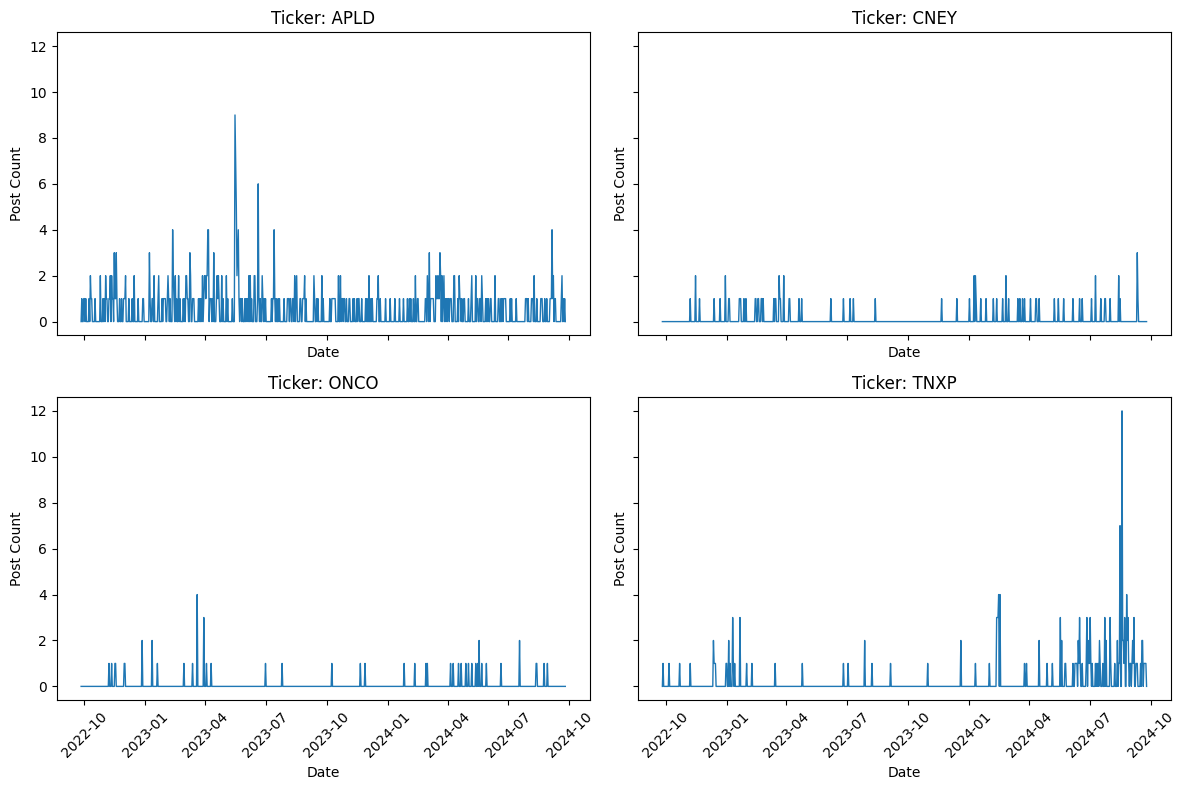

In [61]:
# Get the unique tickers
tickers = submission_counts['ticker'].unique()

# Create subplots (2x2 grid for 4 tickers)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot for each ticker
for i, ticker in enumerate(tickers):
    ticker_data = submission_counts[submission_counts['ticker'] == ticker]
    
    # Adjust the line plot without large markers
    axes[i].plot(ticker_data.index, ticker_data['count'], linestyle='-', linewidth=1)  # Remove markers
    
    axes[i].set_title(f'Ticker: {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Post Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and show
plt.tight_layout()
plt.show()

### <a id='toc2_1_2_'></a>[Daily Submissions vs. Transformed Adjusted Close Price](#toc0_)

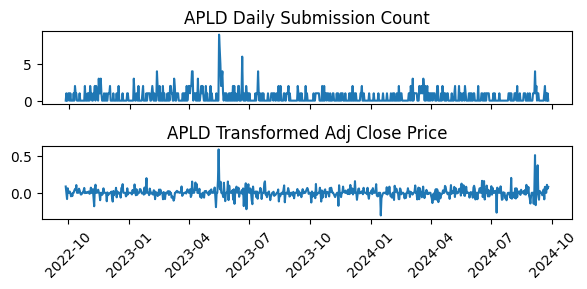

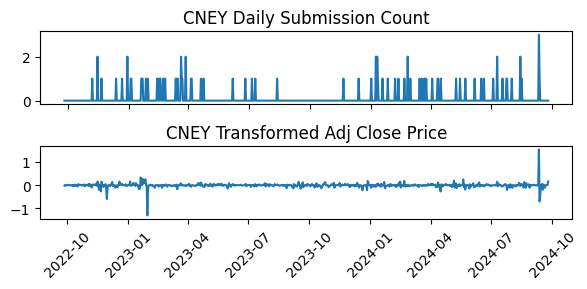

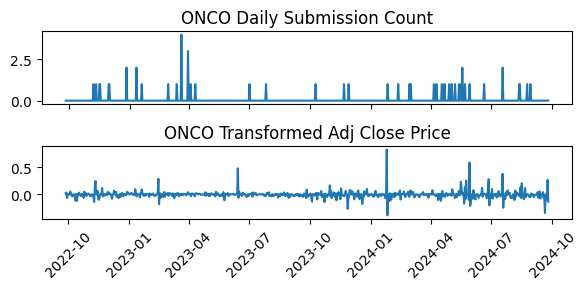

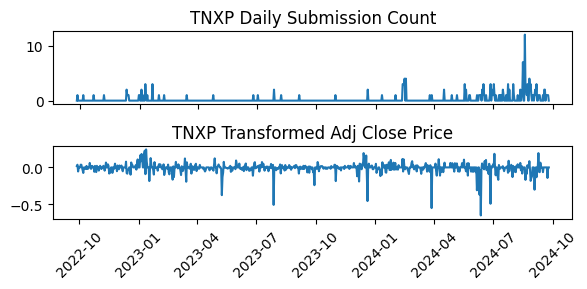

In [62]:
for ticker in df.Ticker.unique():
    y = submission_counts[submission_counts.ticker == ticker]
    newy = df[df.Ticker == ticker].Logdiff

    plt.figure(figsize=(6, 3))

    plt.subplot(211)  # This places the first plot in the upper half of the figure
    plt.plot(y.index, y['count'], label='Daily Submission Count')
    plt.title(f'{ticker} Daily Submission Count')
    plt.xticks(visible=False)  # Rotate dates for better visibility

    plt.subplot(212)  # This places the second plot in the lower half of the figure
    plt.plot(newy.index, newy, label='Transformed Adj Close Price')
    plt.title(f'{ticker} Transformed Adj Close Price')
    plt.xticks(rotation=45)  # Rotate dates for better visibility

    plt.tight_layout()
    plt.show()

### <a id='toc2_1_3_'></a>[Submission word count](#toc0_)

### <a id='toc2_1_4_'></a>[Comments](#toc0_)

In [63]:
rdf.iloc[23].comments

"[{'comment': '\\nDoes this submission fit our subreddit? If it does please **upvote** this comment. If it does not fit the subreddit please **downvote** this comment.\\n\\n\\n\\n---\\n\\n^(*I am a bot, and this comment was made automatically.*) ^(Please) [^(contact)^( )^(us)^( )^(via)^( )^(modmail)](https://www.reddit.com/message/compose?to=/r/pennystocks&subject=Updoot%20bot%20questions!) \\n^(if) ^(you) ^(have) ^(any) ^(questions) ^(or) ^(concerns.)', 'comment_author': 'PennyPumper', 'comment_date': datetime.datetime(2024, 3, 20, 22, 11, 35), 'comment_upvotes': 1}, {'comment': 'Probably right that a few of these smaller Bitcoin miners with low cost power capacity will be bought out by the larger miners that need more capacity and have the capital to expand into newly acquired data centers. Which miners do you think could be on a target list for acquisition?', 'comment_author': 'Polishman001', 'comment_date': datetime.datetime(2024, 3, 21, 16, 58, 3), 'comment_upvotes': 1}]"

In [64]:
rdf.iloc[701].comments

'[{\'comment\': \'100% chance of more dilution and reverse splits. This is MULN version 2.0\', \'comment_author\': \'JonSnow4525\', \'comment_date\': datetime.datetime(2024, 8, 23, 16, 51, 25), \'comment_upvotes\': 3}, {\'comment\': \'The only issue is funding the commercialization of TNX 102. If it gets approved, will they have the money to market it and generate sales? They have no cash flow. My theory is once it gets approved institutions will start buying in. Long on TNXP\', \'comment_author\': \'New-Gas3080\', \'comment_date\': datetime.datetime(2024, 8, 23, 14, 27, 37), \'comment_upvotes\': 1}, {\'comment\': \'Never happening…\', \'comment_author\': \'Joey164\', \'comment_date\': datetime.datetime(2024, 8, 24, 3, 17, 40), \'comment_upvotes\': 1}, {\'comment\': "I\'m just Mullen it over, trying to keep positive.\\n\\nNow buying 10$ of MULN. Just for shits and giggles. Maybe they\'ll explode 2h 2024 too.", \'comment_author\': \'15yearslate\', \'comment_date\': datetime.datetime(202

In [65]:
def safe_eval(comment):
    return eval(comment, {'datetime': datetime})
rdf.comments=rdf.comments.apply(safe_eval)

In [66]:
rdf.comments[23][0].keys()

dict_keys(['comment', 'comment_author', 'comment_date', 'comment_upvotes'])

In [67]:
#turn every comment into one dataframe with 'comment', 'comment_author', 'comment_date', 'post_id', 'Ticker', 'subreddit', 'query', 'url', 'num_comments',  

def comments_to_df(row):
    comments=[]
    for comment in row.comments:
        comments.append(comment)
    commentsdf=pd.DataFrame(comments)
    commentsdf['post_id']=row.id
    commentsdf['post_date']=row.post_date
    commentsdf['ticker']=row.ticker
    commentsdf['subreddit']=row.subreddit
    commentsdf['query']=row.query
    commentsdf['url']=row.url
    commentsdf['num_comments']=row.num_comments
    return commentsdf

comments_df=pd.concat(rdf.apply(comments_to_df, axis=1).tolist(), ignore_index=True)

comments_df.head()


,comment,comment_author,comment_date,comment_upvotes,post_id,post_date,ticker,subreddit,query,url,num_comments
0,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,VisualMod,2024-02-16 03:30:02,1.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
1,Why invest in Microsoft in 2011 when you could...,Juliana1231,2024-02-16 03:43:52,1999.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
2,NVidea at 17.86 lol,deepblue02101996,2024-02-16 04:25:30,851.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
3,Imagine how much money everyone will have if y...,DampCoat,2024-02-16 04:54:37,630.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
4,Wait till you learn how to use the internet fo...,None,2024-02-16 03:43:17,910.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688


In [68]:
#drop all comments that contain 'I am a bot' or 'User Report'
comments_df=comments_df[~comments_df.comment.str.contains('I am a bot')]
comments_df=comments_df[~comments_df.comment.str.contains('User Report')]

In [69]:
comments_df.reset_index(drop=True, inplace=True)
comments_df.head()

,comment,comment_author,comment_date,comment_upvotes,post_id,post_date,ticker,subreddit,query,url,num_comments
0,Why invest in Microsoft in 2011 when you could...,Juliana1231,2024-02-16 03:43:52,1999.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
1,NVidea at 17.86 lol,deepblue02101996,2024-02-16 04:25:30,851.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
2,Imagine how much money everyone will have if y...,DampCoat,2024-02-16 04:54:37,630.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
3,Wait till you learn how to use the internet fo...,None,2024-02-16 03:43:17,910.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688
4,You're all lucky I didn't buy apple back in 20...,Im_ur_Uncle_,2024-02-16 05:04:49,148.0,1aryoah,2024-02-16,APLD,wallstreetbets,APLD,https://i.redd.it/s7q97fka9vic1.jpeg,688


In [70]:
comments_df.comment.isna().sum()

0

In [71]:
comments_df.shape

(22338, 11)

In [72]:
#convert date to date without time
comments_df['comment_date']=comments_df['comment_date'].dt.date

In [73]:
comments_df['count']=1

In [74]:
comment_counts=comments_df.groupby(['ticker', 'comment_date']).count()['count']

In [75]:
#reset index as datetime index, make new column of ticker 
comment_counts=comment_counts.reset_index().set_index('comment_date')

In [76]:
comment_counts

,ticker,count
comment_date,,
2022-09-27,APLD,445
2022-09-28,APLD,22
2022-10-01,APLD,101
2022-10-02,APLD,66
2022-10-03,APLD,5
...,...,...
2024-09-25,TNXP,6
2024-09-26,TNXP,1
2024-09-27,TNXP,1


In [77]:
# Step 0: Reset the index to make 'post_date' a column
comment_counts = comment_counts.reset_index()  # This moves 'post_date' from index to a column

# Step 1: Define the full date range from '2022-09-26' to '2024-09-25'
comment_range = pd.date_range(start='2022-09-26', end='2024-09-25', freq='D')

# Step 2: Create a MultiIndex with the full date range for each ticker
tickers = comment_counts['ticker'].unique()  # Get unique tickers
full_index = pd.MultiIndex.from_product([tickers, date_range], names=['ticker', 'comment_date'])

# Step 3: Reindex the submission_counts DataFrame to ensure all tickers have all dates
comment_counts= (
    comment_counts.set_index(['ticker', 'comment_date'])  # Set both 'ticker' and 'post_date' as indices
    .reindex(full_index, fill_value=0)  # Reindex with full date range and fill missing values with 0
    .reset_index()  # Reset index to get 'ticker' and 'post_date' back as columns
)

# Step 4: Optionally set 'post_date' as the index again if needed
comment_counts.set_index('comment_date', inplace=True)


In [78]:
comment_counts

,ticker,count
comment_date,,
2022-09-26,APLD,0
2022-09-27,APLD,445
2022-09-28,APLD,22
2022-09-29,APLD,0
2022-09-30,APLD,0
...,...,...
2024-09-21,TNXP,11
2024-09-22,TNXP,16
2024-09-23,TNXP,20


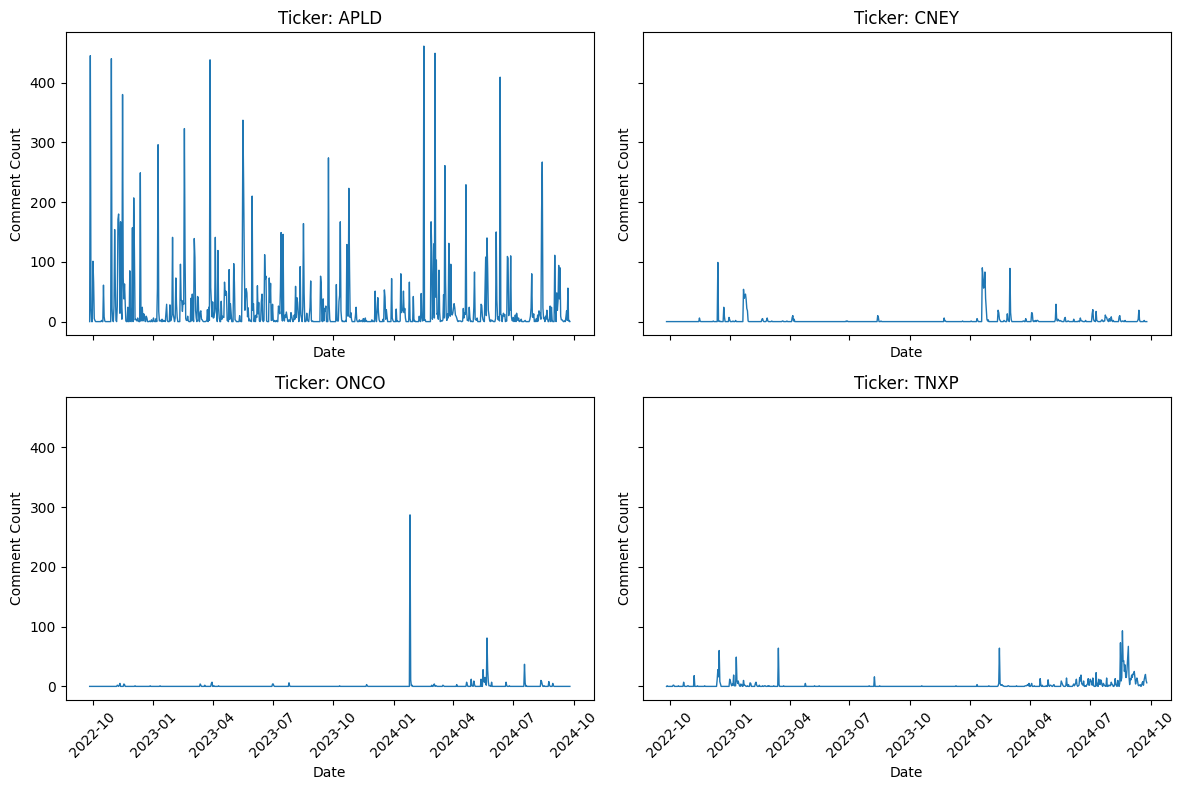

In [79]:
# Get the unique tickers
tickers = comment_counts['ticker'].unique()

# Create subplots (2x2 grid for 4 tickers)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot for each ticker
for i, ticker in enumerate(tickers):
    ticker_data = comment_counts[comment_counts['ticker'] == ticker]
    
    # Adjust the line plot without large markers
    axes[i].plot(ticker_data.index, ticker_data['count'], linestyle='-', linewidth=1)  # Remove markers
    
    axes[i].set_title(f'Ticker: {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Comment Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and show
plt.tight_layout()
plt.show()

### <a id='toc2_1_6_'></a>[Daily Comments vs. Transformed Adjusted Close Price](#toc0_)

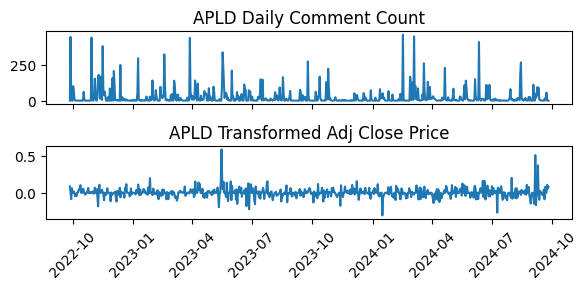

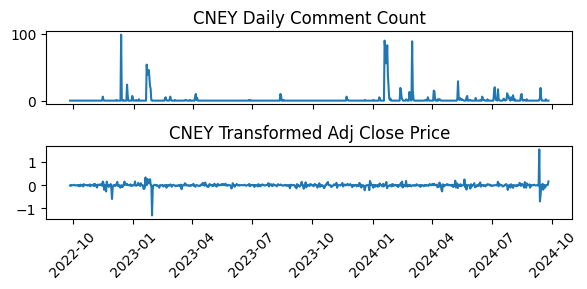

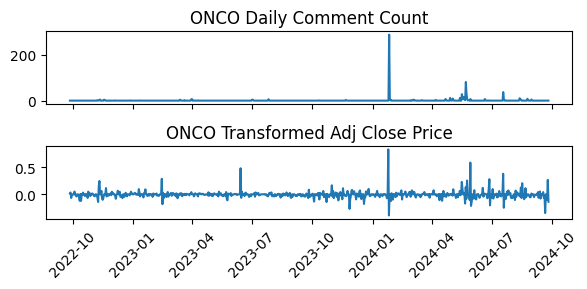

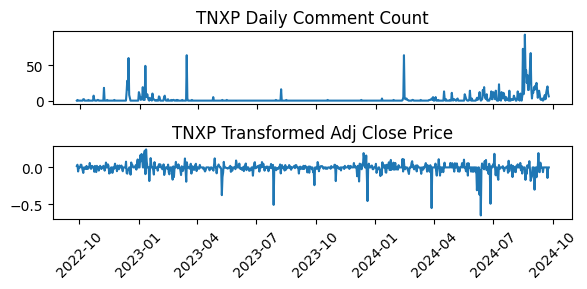

In [ ]:
for ticker in df.Ticker.unique():
    y = comment_counts[comment_counts.ticker == ticker]
    newy = df[df.Ticker == ticker].Logdiff

    plt.figure(figsize=(6, 3))

    plt.subplot(211)  # This places the first plot in the upper half of the figure
    plt.plot(y.index, y['count'], label='Daily Comment Count')
    plt.title(f'{ticker} Daily Comment Count')
    plt.xticks(visible=False)  # Rotate dates for better visibility

    plt.subplot(212)  # This places the second plot in the lower half of the figure
    plt.plot(newy.index, newy, label='Transformed Adj Close Price')
    plt.title(f'{ticker} Transformed Adj Close Price')
    plt.xticks(rotation=45)  # Rotate dates for better visibility

    plt.tight_layout()
    plt.show()

### <a id='toc2_1_5_'></a>[Author](#toc0_)

In [80]:
rdf[rdf.ticker=='APLD'].author.value_counts().head()

author
bigbear0083         23
YGLD                16
Dismal-Jellyfish    15
Gaswden             13
kibblepigeon         9
Name: count, dtype: int64

In [81]:
rdf[rdf.ticker=='CNEY'].author.value_counts().head()

author
Stocksy1234    10
LadsoStocks     6
Jacale1         4
Stock_Titan     4
LouDogg00       3
Name: count, dtype: int64

In [82]:
rdf[rdf.ticker=='ONCO'].author.value_counts().head()

author
Stock_Titan           7
MorningTendies        4
SnooGiraffes5436      3
Hugoonreplit          2
IceBearLikesToCook    2
Name: count, dtype: int64

In [83]:
rdf[rdf.ticker=='TNXP'].author.value_counts().head()

author
Stock_Titan    23
Cubegod69er    15
Marketspike    10
Joey164         8
ale4robin       8
Name: count, dtype: int64

In [126]:
rdf[rdf.author=='bigbear0083'].title.head()

4       (9/20) Friday's Pre-Market News & Stock Movers
5    Wall Street Week Ahead for the trading week be...
6            (10/10) Monday's Pre-Market Movers & News
7     (4/5) Wednesday's Pre-Market Stock Movers & News
8      (4/6) Thursday's Pre-Market Stock Movers & News
Name: title, dtype: object

In [122]:
rdf[rdf.author=='bigbear0083'].post.head()

4    #Good Friday morning traders and investors of ...
5    Good Friday evening to all of you here on r/st...
6    # Good Monday morning traders and investors of...
7    #Good morning traders and investors of the r/S...
8    #Good morning traders and investors of the r/S...
Name: post, dtype: object

In [124]:
rdf[rdf.author=='Stock_Titan'].title.head()

65    APLD | Applied Digital Announces $160 Million ...
66    APLD | Applied Digital Reports Fiscal Third Qu...
67    APLD | Applied Digital Reschedules Fiscal Thir...
68    APLD | Applied Digital Announces Agreement to ...
69    APLD | Applied Digital Hosts Landmark Ribbon C...
Name: title, dtype: object

In [125]:
rdf[rdf.author=='Stock_Titan'].post.head()

65    NaN
66    NaN
67    NaN
68    NaN
69    NaN
Name: post, dtype: object

## <a id='toc2_2_'></a>[Preprocessing (Can use for a better sentiment dataset than Vader)](#toc0_)

### <a id='toc2_2_1_'></a>[Text Preprocessing](#toc0_)

In [86]:
print(textwrap.fill(rdf.post[79], width=80))

⚠️ *Attention all traders and holders of Chinese stocks:*   *You should read
this if you don’t know what a VIE is. Sure, most of you will be repelled by the
great wall of text here (so many words!), but you might want to keep this post
nearby.*    Hello.   You are aware that Wall Street’s bustling bazaar hosts a
veritable Forbidden City of Chinese companies draped in ticker tape rather than
silk.   Today, I will provide background and data on all allowed Chinese
companies listed on three of the largest U.S. stock exchanges: New York Stock
Exchange (NYSE), Nasdaq, and NYSE American.  I should note that a bustling
troupe of 26 national securities exchanges are registered with the SEC in the
United States. Most are owned by the Nasdaq, NYSE, or the Chicago Board Options
Exchange (CBOE).  Nonetheless, based on data from the [World Federation of
Exchanges](https://www.world-exchanges.org) as of August 2023, the NYSE and
Nasdaq were the top two exchanges behemoths of the global financial sta

In [87]:
def clean(s):
    s=re.sub(r'[[\]]', ' ', s)
    urls = re.findall(r'https?://[^\s]+', s)
    for url in urls:
        domain_parts = urlparse(url).netloc.split('.')
        if len(domain_parts) > 1:
            domain = 'url' + domain_parts[1]  # Use the second part of the domain
        else:
            domain = 'urlDomain'  # Default value if domain part is missing
        s = s.replace(url, domain)
    
    s=s.lower()
    s=s.replace('u.s.', ' united states ')
    s=re.sub(r'\d+', ' ', s)
    #remove punctuation
    s = s.translate(str.maketrans('', '', string.punctuation))
    #remove ’
    s=s.replace('’', '').replace('—', ' ')
    #s=s.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    #remove emojis
    s=demoji.replace(s, '')
    #s=s.translate(str.maketrans('', '', string.punctuation))
    #tokenizer = RegexpTokenizer(r'\bU\.S\.|\w+|\$[\d\.]+|\S+')
    #s=tokenizer.tokenize(s)
    tokens=word_tokenize(s)
    sw=stopwords.words('english')+['im', 'ive', 'since', 'cant', 'he', 'thing', 'ago', 'also', 'dont', 'ah', \
                                   'hes', 'shes', 'u', 'going', 'like', 'one', 'two', 'got', 'get', 'gonna', \
                                      'know', 'would', 'go', 'maybe', 'really', 'could', 'should']
    filtered_tokens=[word for word in tokens if word not in sw]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return ' '.join(lemmatized_tokens)

In [88]:
print(textwrap.fill(clean(rdf.post[79]), width=80))

/tmp/ipykernel_73524/1487377036.py:2: FutureWarning: Possible nested set at position 1
  s=re.sub(r'[[\]]', ' ', s)


attention trader holder chinese stock read vie sure repelled great wall text
many word might want keep post nearby hello aware wall street bustling bazaar
host veritable forbidden city chinese company draped ticker tape rather silk
today provide background data allowed chinese company listed three largest
united state stock exchange new york stock exchange nyse nasdaq nyse american
note bustling troupe national security exchange registered sec united state
owned nasdaq nyse chicago board option exchange cboe nonetheless based data
world federation exchange urlworldexchanges august nyse nasdaq top exchange
behemoth global financial stage accounting total trillion valuation traded
across major global exchange photo wall street add allowed include attachment v
according united state china economic security review commission january chinese
company listed three united state exchange total market capitalization billion
valuation year prior january slightly lower chinese company tracked repr

In [160]:
rdf['cleaned_text']=rdf.text.apply(clean)

In [153]:
comments_df['cleaned_comments']=comments_df.comment.apply(clean)

In [154]:
comments_df.cleaned_comments

0                 invest microsoft invested smci last year
1                                               nvidea lol
2        imagine much money everyone buy hold stock yea...
3            wait till learn use internet historical price
4        youre lucky didnt buy apple back went bankrupt...
                               ...                        
22333          thats gon na work lol issue report tnxp sec
22334                                                urlit
22335    see stock risen wildly recently used trade los...
22336                                      report tnxp sec
22337                                                     
Name: comment, Length: 22338, dtype: object

In [155]:
emotions=pd.read_csv('Andbrain_DataSet.csv')
emotions.head()

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346


## <a id='toc2_3_'></a>[VADER Sentiment Analysis](#toc0_)

### <a id='toc2_3_1_'></a>[Submissions](#toc0_)

In [91]:
from scipy.stats import shapiro

In [92]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(s):
    s=re.sub(r'[[\]]', ' ', s)
    urls = re.findall(r'https?://[^\s]+', s)
    for url in urls:
        domain_parts = urlparse(url).netloc.split('.')
        if len(domain_parts) > 1:
            domain = 'url' + domain_parts[1]  # Use the second part of the domain
        else:
            domain = 'urlDomain'  # Default value if domain part is missing
        s = s.replace(url, domain)
    
    cleaned_text=s.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    return sia.polarity_scores(cleaned_text)['compound']

s1='APLD is a really good stock. I think it will go up soon!'
s2='APLD is a really bad stock. I think it will go down soon!'
print(get_sentiment(s1), get_sentiment(s2))

0.54 -0.623


In [93]:
rdf.text.apply(get_sentiment)

0     -0.3182
1      0.7067
2      0.0000
3      0.1027
4      0.9393
        ...  
706    0.6580
707    0.7418
708    0.6908
709    0.4215
710    0.0000
Name: text, Length: 711, dtype: float64

In [94]:
rdf['text_sentiment_score']=rdf.text.apply(get_sentiment)

In [95]:
rdf.iloc[209].text

'# 0. Preface\n\n**TLDR:** For the last 84 years, there has been hope on this sub that GameStop does a Share Recall and forces SHFs to close their short positions. However we learned that in 2003 the SEC and DTC made it impossible for companies to do Share Recalls of their stock, even when trying to protect themselves from naked shorting. Share Recalls are instead something that financial institutions can do, to recall shares lent to short sellers...however seemingly not an action likely to happen in the GameStop saga.\n\nOf course there is an "alternative" Share Recall happening, in the form of retail investors gradually DRSing their stock. This is something GameStop can encourage and report on from the side, but not something they can directly effect. However I have found evidence that companies such as GameStop are able to direct something akin to a Share Recall - a mandatory Share Surrender. This DD presents evidence and a very interesting, relatively recent precedent of a company 

In [96]:
rdf[['post_date', 'ticker', 'text_sentiment_score']].sort_values(by=['ticker', 'post_date'])

,post_date,ticker,text_sentiment_score
209,2022-09-27,APLD,0.9999
180,2022-09-30,APLD,0.9709
100,2022-10-01,APLD,0.9953
148,2022-10-03,APLD,0.9393
16,2022-10-08,APLD,0.9997
...,...,...,...
696,2024-09-19,TNXP,0.9536
690,2024-09-21,TNXP,0.0000
687,2024-09-22,TNXP,0.6072
678,2024-09-23,TNXP,-0.8821


In [97]:
rdf.groupby('ticker').text_sentiment_score.describe()

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
APLD,404.0,0.699011,0.509098,-0.9992,0.585475,0.9870,0.998525,1.0000
CNEY,84.0,0.720885,0.464223,-0.9941,0.508350,0.9901,0.998275,0.9997
ONCO,51.0,0.400367,0.494382,-0.9185,0.000000,0.5267,0.800050,0.9935
TNXP,172.0,0.246851,0.494265,-0.8821,0.000000,0.0000,0.701000,0.9998


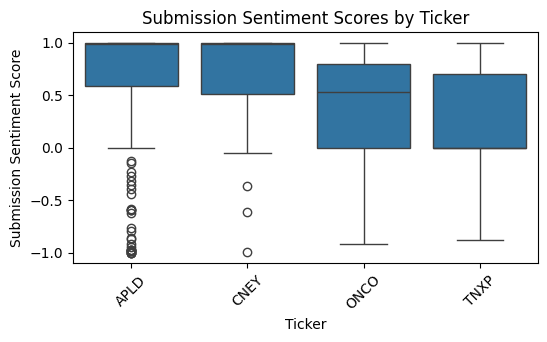

In [98]:
#plot boxplot of post sentiment scores by ticker
plt.figure(figsize=(6, 3))
sns.boxplot(x='ticker', y='text_sentiment_score', data=rdf)
plt.title('Submission Sentiment Scores by Ticker')
plt.ylabel('Submission Sentiment Score')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.show()



In [99]:
for ticker in rdf.ticker.unique():
    data = rdf[rdf.ticker == ticker].text_sentiment_score
    stat, p = shapiro(data)
    print(f'{ticker} Shapiro-Wilk Test: Statistics={stat:.3f}, p={p:.3f}')

APLD Shapiro-Wilk Test: Statistics=0.651, p=0.000
CNEY Shapiro-Wilk Test: Statistics=0.647, p=0.000
ONCO Shapiro-Wilk Test: Statistics=0.913, p=0.001
TNXP Shapiro-Wilk Test: Statistics=0.929, p=0.000


Submission sentiment scores are not normally distributed for each ticker. We can use the median to compute daily scores.

In [100]:
# Define the date range from 2022-09-26 to 2024-09-25
date_range = pd.date_range(start='2022-09-26', end='2024-09-25', freq='D')

# Group by ticker and post_date, calculate median sentiment, and reset index
daily_text_sentiment = (
    rdf.groupby(['ticker', 'post_date'])
    .text_sentiment_score.median()
    .reset_index()
)

# Ensure post_date is in datetime format
daily_text_sentiment['post_date'] = pd.to_datetime(daily_text_sentiment['post_date'])

# Create a MultiIndex to cover all dates for all tickers
tickers = daily_text_sentiment['ticker'].unique()
full_index = pd.MultiIndex.from_product([tickers, date_range], names=['ticker', 'post_date'])

# Reindex the DataFrame to ensure all tickers have all dates, filling missing values with 0
daily_text_sentiment = (
    daily_text_sentiment.set_index(['ticker', 'post_date'])
    .reindex(full_index, fill_value=0)
    .reset_index()
)

# Set post_date as index and ensure the column order is correct
daily_text_sentiment.set_index('post_date', inplace=True)



In [101]:
daily_text_sentiment

,ticker,text_sentiment_score
post_date,,
2022-09-26,APLD,0.0000
2022-09-27,APLD,0.9999
2022-09-28,APLD,0.0000
2022-09-29,APLD,0.0000
2022-09-30,APLD,0.9709
...,...,...
2024-09-21,TNXP,0.0000
2024-09-22,TNXP,0.6072
2024-09-23,TNXP,-0.8821


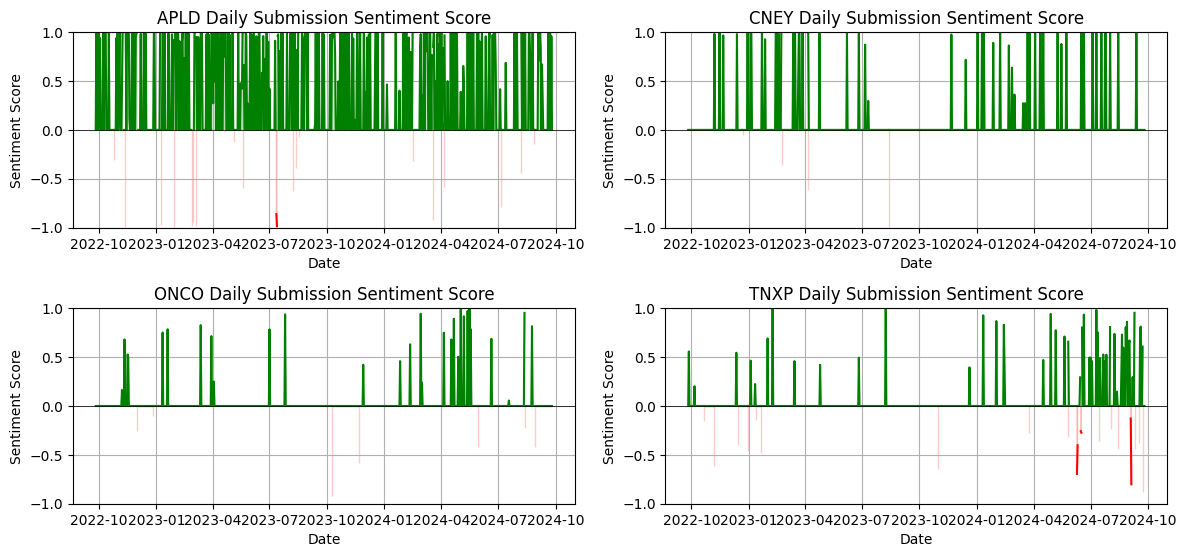

In [102]:
plt.figure(figsize=(12, 8))

for i, ticker in enumerate(daily_text_sentiment.ticker.unique()):
    data = daily_text_sentiment[daily_text_sentiment.ticker == ticker]
    
    plt.subplot(3, 2, i+1)
    
    # Plot the positive sentiment scores (green line)
    plt.plot(data.index, data.text_sentiment_score.where(data.text_sentiment_score >= 0), label='Positive Sentiment', color='green')
    
    # Plot the negative sentiment scores (red line)
    plt.plot(data.index, data.text_sentiment_score.where(data.text_sentiment_score < 0), label='Negative Sentiment', color='red')
    
    # Add title, labels, and grid
    plt.title(f'{ticker} Daily Submission Sentiment Score')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.ylim(-1, 1)
    plt.grid()
    
    # Add horizontal line at y=0
    plt.axhline(0, color='black', linewidth=0.5)
    
    # Optional: Fill between the line and y=0 for visual clarity (green for positive, red for negative)
    plt.fill_between(data.index, data.text_sentiment_score, 0, where=data.text_sentiment_score >= 0, color='green', alpha=0.2)
    plt.fill_between(data.index, data.text_sentiment_score, 0, where=data.text_sentiment_score < 0, color='red', alpha=0.2)

plt.tight_layout()
plt.show()

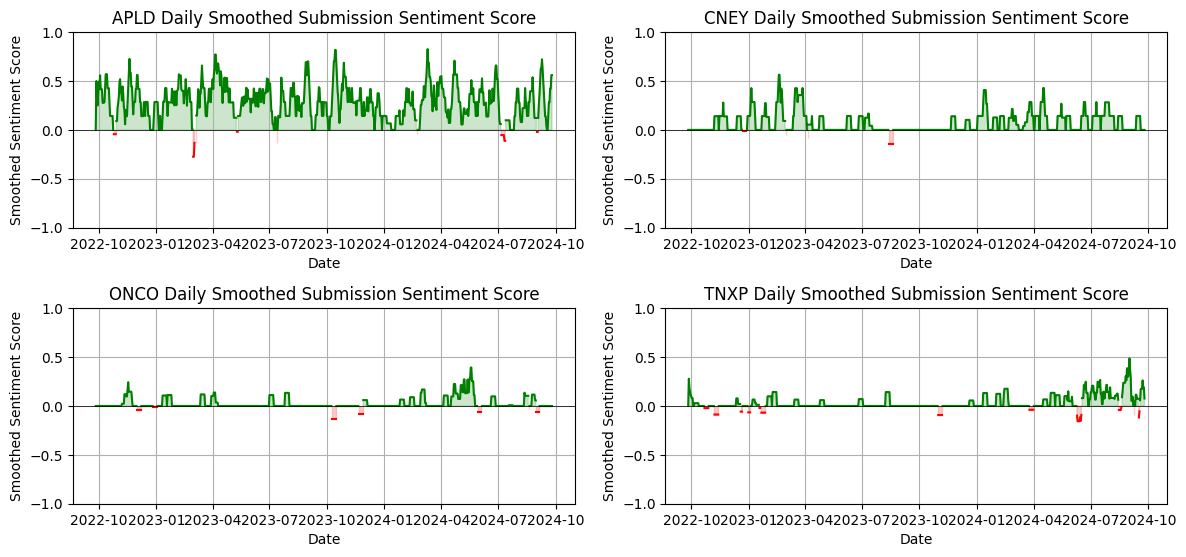

In [103]:

# Define a window for the rolling average (e.g., 7-day smoothing)
window_size = 7

plt.figure(figsize=(12, 8))

for i, ticker in enumerate(daily_text_sentiment.ticker.unique()):
    data = daily_text_sentiment[daily_text_sentiment.ticker == ticker]
    
    # Apply rolling mean to smooth the sentiment scores
    smoothed_data = data['text_sentiment_score'].rolling(window=window_size, min_periods=1).mean()
    
    plt.subplot(3, 2, i+1)
    
    # Plot the positive sentiment scores (green line) smoothed
    plt.plot(data.index, smoothed_data.where(smoothed_data >= 0), label='Positive Sentiment', color='green')
    
    # Plot the negative sentiment scores (red line) smoothed
    plt.plot(data.index, smoothed_data.where(smoothed_data < 0), label='Negative Sentiment', color='red')
    
    # Add title, labels, and grid
    plt.title(f'{ticker} Daily Smoothed Submission Sentiment Score')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Sentiment Score')
    plt.ylim(-1, 1)
    plt.grid()
    
    # Add horizontal line at y=0
    plt.axhline(0, color='black', linewidth=0.5)
    
    # Fill between the line and y=0 for visual clarity (green for positive, red for negative)
    plt.fill_between(data.index, smoothed_data, 0, where=smoothed_data >= 0, color='green', alpha=0.2)
    plt.fill_between(data.index, smoothed_data, 0, where=smoothed_data < 0, color='red', alpha=0.2)

plt.tight_layout()
plt.show()

### <a id='toc2_3_2_'></a>[Comments](#toc0_)

In [104]:
comments_df['comment_sentiment_score']=comments_df.comment.apply(get_sentiment)

In [105]:
comments_df.comment_sentiment_score.head()

0    0.0000
1    0.4215
2   -0.6908
3    0.0000
4   -0.2023
Name: comment_sentiment_score, dtype: float64

In [106]:
print(textwrap.fill(comments_df.iloc[2].comment, width=80))

Imagine how much money everyone will have if you buy and hold stocks for 15
years and stop blowing up accounts with options.   Fuck it I’m buying some more
options tomorrow, it’s payday and the bars aren’t getting a cent.


In [107]:
comments_df[['post_date', 'ticker', 'comment_sentiment_score']].sort_values(by=['ticker', 'post_date'])

,post_date,ticker,comment_sentiment_score
5851,2022-09-27,APLD,0.5093
5852,2022-09-27,APLD,0.6908
5853,2022-09-27,APLD,0.0000
5854,2022-09-27,APLD,0.7303
5855,2022-09-27,APLD,0.3257
...,...,...,...
21967,2024-09-24,TNXP,-0.5267
21968,2024-09-24,TNXP,-0.5023
21969,2024-09-24,TNXP,0.4019
21970,2024-09-24,TNXP,0.4703


In [108]:
comments_df.groupby('ticker').comment_sentiment_score.describe()

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
APLD,18477.0,0.157183,0.454366,-0.9967,0.0,0.0,0.5106,0.9990
CNEY,1392.0,0.121991,0.368658,-0.9246,0.0,0.0,0.4019,0.9987
ONCO,712.0,0.157867,0.397252,-0.9164,0.0,0.0,0.4404,0.9914
TNXP,1757.0,0.136807,0.430081,-0.9505,0.0,0.0,0.4478,0.9958


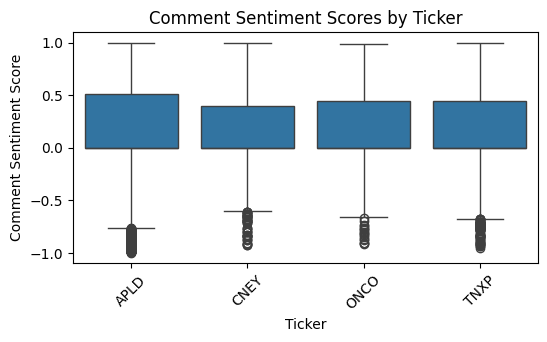

In [109]:
#plot boxplot of post sentiment scores by ticker
plt.figure(figsize=(6, 3))
sns.boxplot(x='ticker', y='comment_sentiment_score', data=comments_df)
plt.title('Comment Sentiment Scores by Ticker')
plt.ylabel('Comment Sentiment Score')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.show()



In [110]:
for ticker in comments_df.ticker.unique():
    data = comments_df[comments_df.ticker == ticker].comment_sentiment_score
    stat, p = shapiro(data)
    print(f'{ticker} Shapiro-Wilk Test: Statistics={stat:.3f}, p={p:.3f}')

APLD Shapiro-Wilk Test: Statistics=0.961, p=0.000
CNEY Shapiro-Wilk Test: Statistics=0.919, p=0.000
ONCO Shapiro-Wilk Test: Statistics=0.937, p=0.000
TNXP Shapiro-Wilk Test: Statistics=0.949, p=0.000


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18477.
  res = hypotest_fun_out(*samples, **kwds)


Comment sentiment scores are not normally distributed for each ticker. We can use the median to compute daily scores.

In [111]:
# Define the date range from 2022-09-26 to 2024-09-25
date_range = pd.date_range(start='2022-09-26', end='2024-09-25', freq='D')

# Group by ticker and post_date, calculate median sentiment, and reset index
daily_comment_sentiment = (
    comments_df.groupby(['ticker', 'comment_date'])
    .comment_sentiment_score.median()
    .reset_index()
)

# Ensure post_date is in datetime format
daily_comment_sentiment['comment_date'] = pd.to_datetime(daily_comment_sentiment['comment_date'])

# Create a MultiIndex to cover all dates for all tickers
tickers = daily_comment_sentiment['ticker'].unique()
full_index = pd.MultiIndex.from_product([tickers, date_range], names=['ticker', 'comment_date'])

# Reindex the DataFrame to ensure all tickers have all dates, filling missing values with 0
daily_comment_sentiment = (
    daily_comment_sentiment.set_index(['ticker', 'comment_date'])
    .reindex(full_index, fill_value=0)
    .reset_index()
)

# Set post_date as index and ensure the column order is correct
daily_comment_sentiment.set_index('comment_date', inplace=True)



In [112]:
daily_comment_sentiment

,ticker,comment_sentiment_score
comment_date,,
2022-09-26,APLD,0.00000
2022-09-27,APLD,0.27550
2022-09-28,APLD,0.39265
2022-09-29,APLD,0.00000
2022-09-30,APLD,0.00000
...,...,...
2024-09-21,TNXP,0.00000
2024-09-22,TNXP,0.40450
2024-09-23,TNXP,0.02580


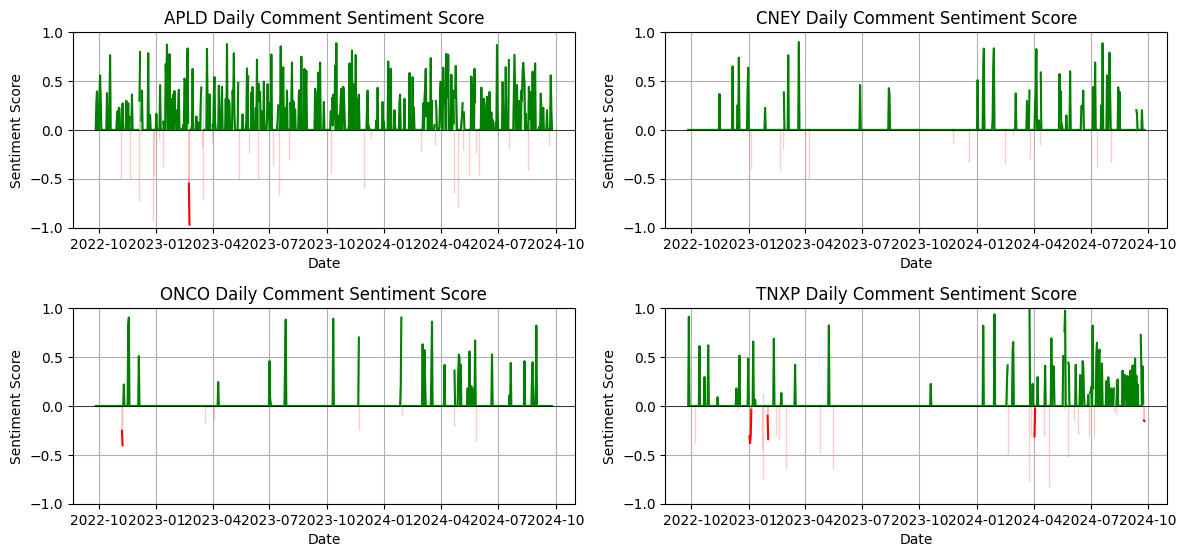

In [113]:
plt.figure(figsize=(12, 8))

for i, ticker in enumerate(daily_comment_sentiment.ticker.unique()):
    data = daily_comment_sentiment[daily_comment_sentiment.ticker == ticker]
    
    plt.subplot(3, 2, i+1)
    
    # Plot the positive sentiment scores (green line)
    plt.plot(data.index, data.comment_sentiment_score.where(data.comment_sentiment_score >= 0), label='Positive Sentiment', color='green')
    
    # Plot the negative sentiment scores (red line)
    plt.plot(data.index, data.comment_sentiment_score.where(data.comment_sentiment_score < 0), label='Negative Sentiment', color='red')
    
    # Add title, labels, and grid
    plt.title(f'{ticker} Daily Comment Sentiment Score')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.ylim(-1, 1)
    plt.grid()
    
    # Add horizontal line at y=0
    plt.axhline(0, color='black', linewidth=0.5)
    
    # Optional: Fill between the line and y=0 for visual clarity (green for positive, red for negative)
    plt.fill_between(data.index, data.comment_sentiment_score, 0, where=data.comment_sentiment_score >= 0, color='green', alpha=0.2)
    plt.fill_between(data.index, data.comment_sentiment_score, 0, where=data.comment_sentiment_score < 0, color='red', alpha=0.2)

plt.tight_layout()
plt.show()

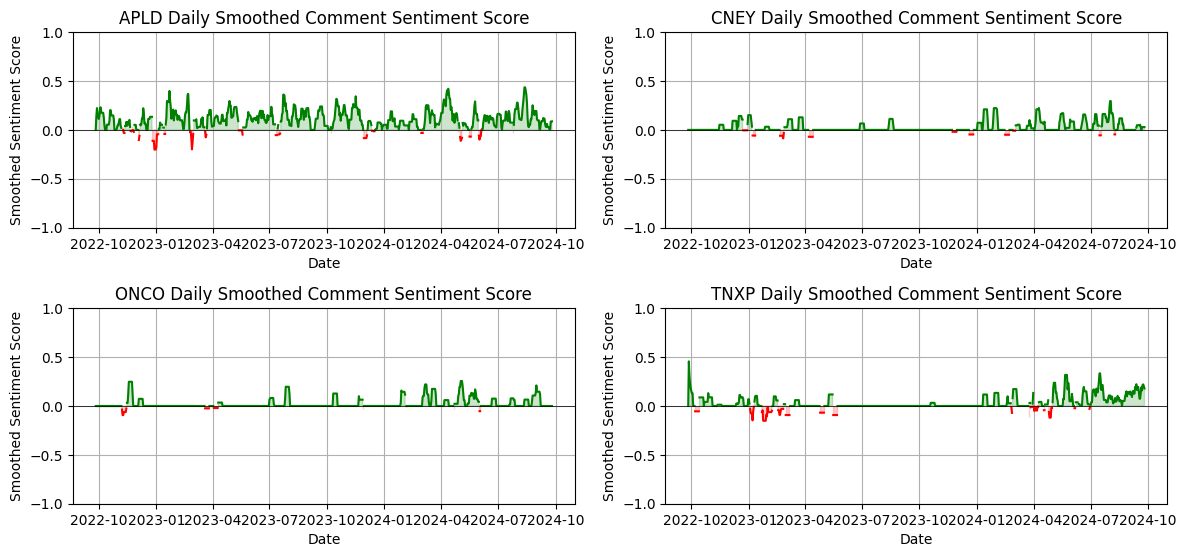

In [114]:

# Define a window for the rolling average (e.g., 7-day smoothing)
window_size = 7

plt.figure(figsize=(12, 8))

for i, ticker in enumerate(daily_comment_sentiment.ticker.unique()):
    data = daily_comment_sentiment[daily_comment_sentiment.ticker == ticker]
    
    # Apply rolling mean to smooth the sentiment scores
    smoothed_data = data['comment_sentiment_score'].rolling(window=window_size, min_periods=1).mean()
    
    plt.subplot(3, 2, i+1)
    
    # Plot the positive sentiment scores (green line) smoothed
    plt.plot(data.index, smoothed_data.where(smoothed_data >= 0), label='Positive Sentiment', color='green')
    
    # Plot the negative sentiment scores (red line) smoothed
    plt.plot(data.index, smoothed_data.where(smoothed_data < 0), label='Negative Sentiment', color='red')
    
    # Add title, labels, and grid
    plt.title(f'{ticker} Daily Smoothed Comment Sentiment Score')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Sentiment Score')
    plt.ylim(-1, 1)
    plt.grid()
    
    # Add horizontal line at y=0
    plt.axhline(0, color='black', linewidth=0.5)
    
    # Fill between the line and y=0 for visual clarity (green for positive, red for negative)
    plt.fill_between(data.index, smoothed_data, 0, where=smoothed_data >= 0, color='green', alpha=0.2)
    plt.fill_between(data.index, smoothed_data, 0, where=smoothed_data < 0, color='red', alpha=0.2)

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [115]:
daily_text_sentiment

,ticker,text_sentiment_score
post_date,,
2022-09-26,APLD,0.0000
2022-09-27,APLD,0.9999
2022-09-28,APLD,0.0000
2022-09-29,APLD,0.0000
2022-09-30,APLD,0.9709
...,...,...
2024-09-21,TNXP,0.0000
2024-09-22,TNXP,0.6072
2024-09-23,TNXP,-0.8821


In [116]:
daily_comment_sentiment

,ticker,comment_sentiment_score
comment_date,,
2022-09-26,APLD,0.00000
2022-09-27,APLD,0.27550
2022-09-28,APLD,0.39265
2022-09-29,APLD,0.00000
2022-09-30,APLD,0.00000
...,...,...
2024-09-21,TNXP,0.00000
2024-09-22,TNXP,0.40450
2024-09-23,TNXP,0.02580


In [133]:
sentiment_df=daily_text_sentiment

In [134]:
sentiment_df['comment_sentiment_score']=daily_comment_sentiment['comment_sentiment_score']

In [135]:
sentiment_df

,ticker,text_sentiment_score,comment_sentiment_score
post_date,,,
2022-09-26,APLD,0.0000,0.00000
2022-09-27,APLD,0.9999,0.27550
2022-09-28,APLD,0.0000,0.39265
2022-09-29,APLD,0.0000,0.00000
2022-09-30,APLD,0.9709,0.00000
...,...,...,...
2024-09-21,TNXP,0.0000,0.00000
2024-09-22,TNXP,0.6072,0.40450
2024-09-23,TNXP,-0.8821,0.02580


In [136]:
# Calculate the correlation between daily submission sentiment and daily comment sentiment
correlation = sentiment_df.groupby('ticker').text_sentiment_score.corr(sentiment_df.comment_sentiment_score)
correlation

ticker
APLD    0.022452
CNEY    0.051712
ONCO    0.020698
TNXP    0.023512
Name: text_sentiment_score, dtype: float64

# <a id='toc3_'></a>[Modeling](#toc0_)

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [177]:
sentiment_df=sentiment_df[sentiment_df.index!='2022-09-26']

In [178]:
sentiment_df

,ticker,text_sentiment_score,comment_sentiment_score
post_date,,,
2022-09-27,APLD,0.9999,0.27550
2022-09-28,APLD,0.0000,0.39265
2022-09-29,APLD,0.0000,0.00000
2022-09-30,APLD,0.9709,0.00000
2022-10-01,APLD,0.9953,0.00000
...,...,...,...
2024-09-21,TNXP,0.0000,0.00000
2024-09-22,TNXP,0.6072,0.40450
2024-09-23,TNXP,-0.8821,0.02580


In [179]:
df['text_sentiment_score']=sentiment_df['text_sentiment_score']
df['comment_sentiment_score']=sentiment_df['comment_sentiment_score']

In [180]:
X=df[['text_sentiment_score', 'comment_sentiment_score']]
y=df['Priceincrease']

In [181]:
y.value_counts()

Priceincrease
0.0    2115
1.0     805
Name: count, dtype: int64

In [182]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=123, class_weight='balanced')

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.70
              precision    recall  f1-score   support

         0.0       0.73      0.94      0.82       421
         1.0       0.36      0.09      0.14       163

    accuracy                           0.70       584
   macro avg       0.54      0.51      0.48       584
weighted avg       0.62      0.70      0.63       584



In [189]:
df['rolling_text_sentiment']=df.text_sentiment_score.rolling(window=7).mean()
df['rolling_comment_sentiment']=df.comment_sentiment_score.rolling(window=7).mean()

In [190]:
X=df[['rolling_text_sentiment', 'rolling_comment_sentiment']]
y=df['Priceincrease']

In [191]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=123, class_weight='balanced')

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78       421
         1.0       0.30      0.18      0.22       163

    accuracy                           0.65       584
   macro avg       0.51      0.51      0.50       584
weighted avg       0.61      0.65      0.62       584



In [118]:
df.groupby('Ticker').Fulltimeemployees.value_counts()

Ticker  Fulltimeemployees
APLD    150                  730
CNEY    30                   730
ONCO    12                   730
TNXP    103                  730
Name: count, dtype: int64

In [119]:
rdf.columns

Index(['ticker', 'subreddit', 'query', 'title', 'score', 'id', 'author', 'url',
       'post_date', 'post_upvotes', 'post', 'num_comments', 'comments', 'text',
       'count', 'text_sentiment_score'],
      dtype='object')

In [158]:
rdf

,ticker,subreddit,query,title,score,id,author,url,post_date,post_upvotes,post,num_comments,comments,text,count,text_sentiment_score
0,APLD,wallstreetbets,APLD,Found a newspaper from 2011. Imagine all the g...,5106,1aryoah,nywarpath,https://i.redd.it/s7q97fka9vic1.jpeg,2024-02-16,5106,NaN,688,[{'comment': ' **User Report**| | | | :--|:--|...,Found a newspaper from 2011. Imagine all the g...,1,-0.3182
1,APLD,wallstreetbets,APLD,Micro Trading Options on QQQ!,314,1fbjdhn,Vivo__,https://i.redd.it/vd1e4xdqugnd1.jpeg,2024-09-07,314,The good side to options is its worst side! Yo...,153,[{'comment': ' **User Report**| | | | :--|:--|...,The good side to options is its worst side! Yo...,1,0.7067
2,APLD,wallstreetbets,APLD,Most Anticipated Earnings Releases for the wee...,259,194hj19,ItsNotYourFault,https://i.redd.it/d2nn39ignwbc1.png,2024-01-12,259,NaN,244,[{'comment': 'Not open on MLK Day? He’d want p...,Most Anticipated Earnings Releases for the wee...,1,0.0000
3,APLD,wallstreetbets,APLD,Dow drops more than 400 points as Wall Street ...,214,1bu74lx,mediterranean2,https://www.reddit.com/r/wallstreetbets/commen...,2024-04-02,214,The Dow Jones Industrial Average\n fell for a ...,54,[{'comment': ' **User Report**| | | | :--|:--|...,The Dow Jones Industrial Average\n fell for a ...,1,0.1027
4,APLD,stocks,APLD,(9/20) Friday's Pre-Market News & Stock Movers,18,1flatw5,bigbear0083,https://www.reddit.com/r/stocks/comments/1flat...,2024-09-20,18,#Good Friday morning traders and investors of ...,0,[],#Good Friday morning traders and investors of ...,1,0.9393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,TNXP,tnxp,Tonix,Hopefully the upcoming presentation creates so...,5,1d1bybq,Joey164,https://i.redd.it/yy5qvt50cu2d1.jpeg,2024-05-26,5,NaN,14,"[{'comment': 'I am holding too..', 'comment_au...",Hopefully the upcoming presentation creates so...,1,0.6580
707,TNXP,tnxp,Tonix,Worth a look!,0,1dtclc5,Joey164,https://www.reddit.com/r/TNXP/comments/1dtclc5...,2024-07-02,0,"62% short interest, 560% ctb ( 1,132% max), an...",2,"[{'comment': 'Zoom out - worth a look', 'comme...","62% short interest, 560% ctb ( 1,132% max), an...",1,0.7418
708,TNXP,tnxp,Tonix,You wonder why they did a buyback?,7,10pzco8,Banished_Privateer,https://www.reddit.com/r/TNXP/comments/10pzco8...,2023-01-31,7,Tonix Pharmaceuticals Holding Corp. announced...,21,[{'comment': 'If they do another reverse split...,Tonix Pharmaceuticals Holding Corp. announced...,1,0.6908
709,TNXP,tnxp,Tonix,Going back to 0.04 cents soon lol,9,12y7ya1,Bashir-Sangawi,https://www.reddit.com/r/TNXP/comments/12y7ya1...,2023-04-25,9,NaN,6,[{'comment': 'Tonix cost me 10k with that last...,Going back to 0.04 cents soon lol,1,0.4215


In [162]:
rdf.groupby(['ticker', 'post_date']).cleaned_text.sum()

ticker  post_date 
APLD    2022-09-27    preface tldr last year hope sub gamestop share...
        2022-09-30    pixy shiftpixy ran dual listing early sept jup...
        2022-10-01    quote lecture available youtube search peter l...
        2022-10-03    global confidential computing market size esti...
        2022-10-08    good saturday morning rstockmarket hope everyo...
                                            ...                        
TNXP    2024-09-19    tnxp tonix pharmaceutical announces issuance u...
        2024-09-21      someone explain second item shareholder meeting
        2024-09-22    urlglobenewswire another user posted impending...
        2024-09-23    honestly believed something come crappy invest...
        2024-09-24                                         urlcom tonix
Name: cleaned_text, Length: 506, dtype: object

In [165]:
# Ensure 'post_date' is a datetime type
rdf['post_date'] = pd.to_datetime(rdf['post_date'])

# Set 'post_date' as the index
rdf.set_index('post_date', inplace=True)

# Create the full date range from 2022-09-27 to 2024-09-25
date_range = pd.date_range(start='2022-09-27', end='2024-09-25', freq='D')

# Resample the data by ticker, filling missing dates with empty strings for cleaned_text
def resample_by_ticker(ticker_df):
    # Reindex to ensure all dates are covered and fill missing 'cleaned_text' with empty strings
    return ticker_df.reindex(date_range).fillna({'cleaned_text': ''})

# Apply this resampling function for each ticker separately
resampled_df = rdf.groupby('ticker').apply(resample_by_ticker)

# Reset the index to have both 'ticker' and 'post_date' as columns again
resampled_df = resampled_df.reset_index(level=0)  # Reset the 'ticker' index
resampled_df.index.name = 'post_date'  # Name the date index back to 'post_date'

# View the final result
resampled_df.head()

ValueError: cannot reindex on an axis with duplicate labels

In [156]:
X=df[['cleaned_text', 'cleaned_comments']]
y=df['Priceincrease']

KeyError: "None of [Index(['cleaned_text', 'cleaned_comments'], dtype='object')] are in the [columns]"

In [169]:
#add is_weekday column in df
df['is_weekday']=df.index.weekday<5
#turn it into 1.0 and 0.0
df['is_weekday']=df['is_weekday'].astype(float)

In [170]:
df.is_weekday

Date
2022-09-27    1.0
2022-09-28    1.0
2022-09-29    1.0
2022-09-30    1.0
2022-10-01    0.0
             ... 
2024-09-21    0.0
2024-09-22    0.0
2024-09-23    1.0
2024-09-24    1.0
2024-09-25    1.0
Name: is_weekday, Length: 2920, dtype: float64